<a href="https://colab.research.google.com/github/johnStrong23/parking_test_v1/blob/main/dl_parking_space_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install Detectron2**

---



Need to install an old version of pytorch

In [ ]:
!pip install pyyaml==5.1
# workaround: install old version of pytorch since detectron2 hasn't released packages for pyTorch 1.9
!pip install torch==1.8.0+cu101 torchvision==0.9.0+cu101 -f https://download.pytorch.org/whl/torch_stable.html

# install detectron2 that matches pytorch 1.8 
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.8/index.html

# After installation you need to restart the runtime in runtime
#exit(0)


Need a PyTorch "1.8.0+cu101" installed

In [ ]:
# Check pyTorch version
import torch, torchvision
print(torch.__version__, torch.cuda.is_available())
print(torchvision.__version__)
assert torch.__version__ .startswith("1.8.0")

1.8.0+cu101 True
0.9.0+cu101


# **Download the Parking-Space Video from Google-Drive**

---



Perform **Authorization**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



Mounted at /content/drive/


Reach my Google Drive and **Copy** Video-Content

In [ ]:
# Make a temporary directory in Google colab
!mkdir -p /content/parking-space/Videos/frames >> /dev/null

#Copy Video stored in Google Drive to COLAB
!cp /content/drive/My\ Drive/ML-apps/parking-space-monitoring/Videos/*.mp4 parking-space/Videos/

In [ ]:
!mkdir -p /content/parking-space/Videos/frames-all

Only for Special Cases [1]: Copy Produced Frames from Google Colab --> Google Drive

---

In [ ]:
#!ls /content/drive/My\ Drive//ML-apps/parking-space-monitoring/Videos/frames/

!cp parking-space/Videos/frames/*.png /content/drive/My\ Drive/ML-apps/parking-space-monitoring/Videos/frames/a2_b

Only for Special Cases [2]: Goto "/frames" folder && **Delete** all images

---



In [ ]:
!rm /content/parking-space/Videos/frames/*.png

#**Transform Video to Frames** ... ... Save One_Frame_Each (.i.e) 24

Important Constants

In [ ]:
MAIN_FOLDER = '/content/parking-space'
VIDEOS_FOLDER = MAIN_FOLDER + '/Videos'
OUTPUT_FRAMES_PATH = VIDEOS_FOLDER + '/frames'

FRAME_NAME = 'frame'

# *** IMPORTANT - How Many Frames to Save / Frame-Rate *** 
one_frame_each = 24

!(if [ -d {OUTPUT_FRAMES_PATH} ]; then \
echo 'OUTPUT Directory Already EXISTS' && rm -rf {OUTPUT_FRAMES_PATH}/*.png; else \
echo 'OUTPUT Directory is MISSING'; fi)

all_video_files = !ls {VIDEOS_FOLDER}/*.mp4
# Α5 parking-space
#video_file = all_video_files[0]

# A7 parking-space
#video_file = all_video_files[1]

# A7 parking-space (b)
video_file = all_video_files[2]

print('Parking Space Video Found for Analysis ...' + video_file)

OUTPUT Directory Already EXISTS
Parking Space Video Found for Analysis .../content/parking-space/Videos/video2_b.mp4


# Extract Video-Frames / Framerate = 24 (?)
Capture frames from video and apply **resize** + **rgb2gray** filters --
New Image-Width = **640** 

In [ ]:
# Crop Image = Obtain ROI 
# -----------------------
CROP_ROW = 10000 
CROP_COL = 15000

print( 'Ready to Read and Crop Image --> %d x %d' % (CROP_ROW , CROP_COL) )

import cv2 
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.util import crop
import matplotlib.pyplot as plt
import math
import time

count = 0
success = True

videocap = cv2.VideoCapture(video_file)

start_t = time.time()
while success:
  if ( count%one_frame_each == 0 ):
    success, image = videocap.read()

    if image is None:
      # Finished reading video - No more frames left
      break

    # STEP CROP : Extract a ROI
    image_gray = rgb2gray( image[0:CROP_ROW, 0:CROP_COL] )

    #image_gray = rgb2gray(image)

    #print( "ORI-Image-Shape = %d x %d" % (image.shape[0] , image.shape[1]) )

    if image.shape[1] > 640:
      tmp = resize(image_gray, (math.floor(640/image_gray.shape[1]*image_gray.shape[0]), 640), mode='constant')

      
      #print( "TMPimage-Shape-1 = %d" % tmp.shape[1] )

    #roi = tmp.copy()
    #B = crop(roi, ((50, 100), (50, 50), (0,0)), copy=False)


    plt.imsave("%s/%s%d.png" % (OUTPUT_FRAMES_PATH, FRAME_NAME, count), tmp, cmap=plt.cm.gray)
    #plt.imsave("%s/%s%d.png" % (OUTPUT_FRAMES_PATH, FRAME_NAME, count), roi, cmap=plt.cm.gray)

    print('*', end='')
  else:
    success, image = videocap.read()
  count += 1
end_t = time.time()

elapsed_time = end_t - start_t

# Print Performance Statistics of Frames Extraction Procedure
#  How Many && How Long 
num_frames = !(ls -l {OUTPUT_FRAMES_PATH}/*.png | wc -l)
print("\nNumber of Frames Extracted (frameXXX.PNG) == " + num_frames[0] + '\n*** Elapsed Time = ' + str(elapsed_time) + ' (msecs) ***')

Ready to Read and Crop Image --> 10000 x 15000
**********************************************************************************************************************************************************************************************
Number of Frames Extracted (frameXXX.PNG) == 190
*** Elapsed Time = 63.573288440704346 (msecs) ***


## **Frames-ALL**: Capture All frames from input video

In [ ]:
!rm parking-space/Videos/frames-all/masked*.png

In [ ]:
import cv2 
from skimage.color import rgb2gray
from skimage.transform import resize
from skimage.util import crop
import matplotlib.pyplot as plt
import math
import time

OUTPUT_FRAMES_PATH = 'parking-space/Videos/frames-all'
FRAME_NAME = 'frame'
count = 0
success = True

videocap = cv2.VideoCapture(video_file)

one_frame_each = 2

start_t = time.time()
while success:
  if ( count%one_frame_each == 0 ):
    success, image = videocap.read()
  
    if image is None:
      # Finished reading video - No more frames left
      break

    image_gray = rgb2gray( image )

    if image.shape[1] > 640:
      tmp = resize(image_gray, (math.floor(640/image_gray.shape[1]*image_gray.shape[0]), 640), mode='constant')
   
    plt.imsave("%s/%s%d.png" % (OUTPUT_FRAMES_PATH, FRAME_NAME, count), tmp, cmap=plt.cm.gray)
    print( 'Finished saving frame-%d' % count )
  else:
    success, image = videocap.read()

  count += 1

end_t = time.time()

elapsed_time = end_t - start_t

# Print Performance Statistics of Frames Extraction Procedure
#  How Many && How Long 
num_frames = !(ls -l {OUTPUT_FRAMES_PATH}/*.png | wc -l)
print("\nNumber of Frames Extracted (frameXXX.PNG) == " + num_frames[0] + '\n*** Elapsed Time = ' + str(elapsed_time) + ' (msecs) ***')

# **Start Reading Parking-Slot Coordinates**

Copy CSV file with coordinates .. from Google-Drive to Colab

In [ ]:
HOST_FOLDER = '/content/drive/MyDrive/ML-apps/parking-space-monitoring/'

FILE_EXTENSION ='csv'
#COORDS_FILE = 'intracom-a7.' + FILE_EXTENSION
COORDS_FILE = 'intracom-a7_b.' + FILE_EXTENSION

# Copy COORDS file from Google Drive to Local Colab
!cp {HOST_FOLDER}'/'{COORDS_FILE} {MAIN_FOLDER} 

LOCAL_COORDS_FILE = "%s/%s" % (MAIN_FOLDER, COORDS_FILE)
#print( 'Local Parking-Space Coordinates File --> ' + LOCAL_COORDS_FILE )
!ls -l {LOCAL_COORDS_FILE}

-rw------- 1 root root 1280 Aug  2 12:39 /content/parking-space/intracom-a7_b.csv


# **Read Coords from a CSV file**

1.0


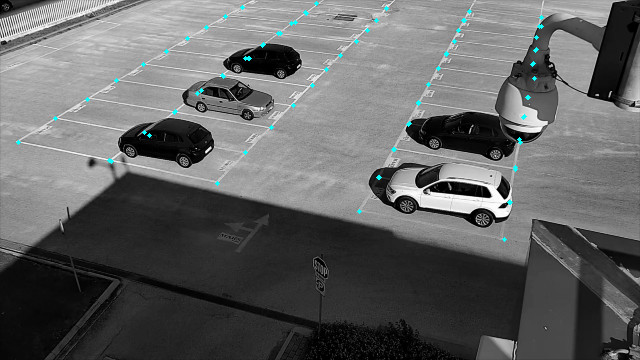

In [ ]:
import csv
print(csv.__version__)

from google.colab.patches import cv2_imshow

# Read Initial Image
all_frames = !(ls {OUTPUT_FRAMES_PATH}/*.png)
frame = all_frames[0]
img = cv2.imread(frame)

_radius = 2

all_parking_slots = []

with open( LOCAL_COORDS_FILE, 'r' ) as stream:
  csv_reader = csv.reader(stream, delimiter=',')
  line_count = 0

  for row in csv_reader:
    if line_count == 0:
      #print('Column names are: {' + " , ".join(row) )
      line_count += 1
    else:
      park_row = row[0]

      slot = row[1]

      corner_01 = row[2]
      if 'None' not in corner_01:
        c01 = corner_01.split('-')
        corner_01_x = int( c01[0] )
        corner_01_y = int( c01[1] ) 

        image = cv2.circle(img, (corner_01_x, corner_01_y), radius=_radius, color=(255,255, 10), thickness=-1)

      corner_02 = row[3]
      if 'None' not in corner_02:
        c02 = corner_02.split('-')
        corner_02_x = int( c02[0] )
        corner_02_y = int( c02[1] ) 
        image = cv2.circle(img, (corner_02_x, corner_02_y), radius=_radius, color=(255,255, 10), thickness=-1)

      corner_03 = row[4]
      if 'None' not in corner_03:
        c03 = corner_03.split('-')
        corner_03_x = int( c03[0] )
        corner_03_y = int( c03[1] ) 
        image = cv2.circle(img, (corner_03_x, corner_03_y), radius=_radius, color=(255,255, 10), thickness=-1)

      corner_04 = row[5]
      if 'None' not in corner_04:
        c04 = corner_04.split('-')
        corner_04_x = int( c04[0] )
        corner_04_y = int( c04[1] ) 
        image = cv2.circle(img, (corner_04_x, corner_04_y), radius=_radius, color=(255,255, 10), thickness=-1)

      #print("Slot=%d , Corner-01=(%d / %d), Corner-02=%s, Corner-03=%s" % (int(slot), corner_01_x, corner_01_y, corner_02, corner_03))

      #image = cv2.circle(img, (114, 162), radius=6, color=(255,255, 10), thickness=-1)
      #image = cv2.circle(img, (114, 162), radius=6, color=(255,255, 10), thickness=-1)

      all_parking_slots.append( [park_row, slot, corner_01, corner_02, corner_03, corner_04] )

      line_count += 1

  cv2_imshow( image )

For illustration purposes only: DISPLAY FIRST 10 LINES OF PARKING_SLOTS_COORDS array

In [ ]:
all_parking_slots[0:10]

[['01', ' 01', ' 13-186', ' 101-205', ' None', ' 52-164'],
 ['01', ' 02', ' 53-163', ' 145-178', ' 170-157', ' 88-139'],
 ['01', ' 03', ' None', ' 170-157', ' 194-138', ' 115-125'],
 ['01', ' 04', ' 115-125', ' 194-138', ' 217-121', ' 143-109'],
 ['01', ' 05', ' 143-109', ' 217-121', ' None', ' 163-97'],
 ['01', ' 06', ' 184-84', ' 256-91', ' 271-81', ' 206-71'],
 ['01', ' 07', ' 206-71', ' 271-81', ' 289-68', ' 221-63'],
 ['01', ' 08', ' 221-63', ' 289-68', ' 302-59', ' 236-53'],
 ['01', ' 09', ' 26-53', ' 302-59', ' 316-48', ' 249-45'],
 ['01', ' 10', ' 246-45', ' 316-48', ' 329-40', ' 270-37']]

*! Finished Reading Parking Space Data - Slots Coordinates are Available !*

In [ ]:
corners_anti_01_0A = {}
corners_anti_01_0A[0] = (107, 206)
corners_anti_01_0A[1] = (211, 227)
corners_anti_01_0A[2] = (239, 197)
corners_anti_01_0A[3] = (145, 177)

corners_anti_05_0A = {}
corners_anti_05_0A[0] = (219, 118)
corners_anti_05_0A[1] = (305, 132)
corners_anti_05_0A[2] = (320, 115)

corners_anti_01_0B = {}
corners_anti_01_0B[0] = (373, 222)
corners_anti_01_0B[1] = (354, 255)
corners_anti_01_0B[2] = (498, 281)

img = cv2.imread(videofile)

image = cv2.circle(img, (114, 162), radius=6, color=(255,255, 10), thickness=-1)
image = cv2.circle(img, (212, 227), radius=6, color=(255,255, 10), thickness=-1)

image = cv2.circle(img, (223, 90), radius=6, color=(255,255, 10), thickness=-1)
image = cv2.circle(img, (300, 131), radius=6, color=(255,255, 10), thickness=-1)

image = cv2.circle(img, (384, 201), radius=6, color=(255,255, 10), thickness=-1)
image = cv2.circle(img, (513, 272), radius=6, color=(255,255, 10), thickness=-1)

image = cv2.circle(img, corners_anti_01_0A[0], radius=4, color=(0,255,255), thickness=-1)
image = cv2.circle(img, corners_anti_01_0A[1], radius=4, color=(0,255,255), thickness=-1)
image = cv2.circle(img, corners_anti_01_0A[2], radius=4, color=(0,255,255), thickness=-1)

image = cv2.circle(img, corners_anti_05_0A[0], radius=4, color=(0,255,255), thickness=-1)
image = cv2.circle(img, corners_anti_05_0A[1], radius=4, color=(0,255,255), thickness=-1)
image = cv2.circle(img, corners_anti_05_0A[2], radius=4, color=(0,255,255), thickness=-1)

image = cv2.circle(img, corners_anti_01_0B[0], radius=4, color=(0,255,255), thickness=-1)
image = cv2.circle(img, corners_anti_01_0B[1], radius=4, color=(0,255,255), thickness=-1)
image = cv2.circle(img, corners_anti_01_0B[2], radius=4, color=(0,255,255), thickness=-1)

cv2_imshow(image)


# **Run a Pre-Trained Detectron2 Model**
---


Prepare the Mask-RCNN PreTrained Model (based on COCO Dataset)

In [ ]:
import time

import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.config import get_cfg
from detectron2.engine import DefaultPredictor
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

start_t = time.time()

# Create a Detectron2 Config
cfg = get_cfg()

# Add project specific configuration (e.g. TensorMask) - if you are not running a model in core library
cfg.merge_from_file(
    model_zoo.get_config_file(
        "COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
    )

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.90
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.MODEL.NMS_THRESH_TEST = 0.90

#cfg.MODEL.DEVICE = "cpu"

# *****************************
# The Trained Predictor at COCO
# *****************************
predictor = DefaultPredictor(cfg)

end_t = time.time()
elapsed_time = end_t - start_t
print('Finished with Mask-RCNN Model Preparation -- Ready for Predictions !' + "\n *** Elapsed Time = " + str(elapsed_time) + " (msecs) ***")

model_final_f10217.pkl: 178MB [00:03, 56.1MB/s]                           
The checkpoint state_dict contains keys that are not used by the model:
  proposal_generator.anchor_generator.cell_anchors.{0, 1, 2, 3, 4}


Finished with Mask-RCNN Model Preparation -- Ready for Predictions !
 *** Elapsed Time = 7.597839832305908 (msecs) ***


Apply the **Mask-RCNN** to Find Cars in Parking Space Frames
---

Clean up frames folder: Remove old MAKSED_ files

In [ ]:
!rm -f {OUTPUT_FRAMES_PATH}/masked*

In [ ]:
!rm -f {OUTPUT_FRAMES_PATH}/diff_*.png

# ***The IMAGE-DIFF Code***

---



In [ ]:
import os

img_0 = cv2.imread( OUTPUT_FRAMES_PATH + '/frame0.png')
img_1 = cv2.imread( OUTPUT_FRAMES_PATH + '/frame' + str(one_frame_each) + '.png')
# Frame Difference
frame_diff = cv2.absdiff(img_1, img_0)
cv2.imwrite( OUTPUT_FRAMES_PATH + '/diff_0_' + str(one_frame_each) + '.png', frame_diff)

previous = img_1
counter = 2*one_frame_each

while True:
  frame_fname  = OUTPUT_FRAMES_PATH + '/frame' + str(counter) + '.png'
  
  img = cv2.imread(frame_fname)

  if img is None:
    # Couldn't Read Image 
    print('Could Not Read Frame ... %s !' % frame_fname)
    break

  # Frame Difference
  frame_diff = cv2.absdiff(img, previous)
  
  bname = '/diff_' + str(counter-one_frame_each) + '_' + str(counter) + '.png' 
  full_bname = OUTPUT_FRAMES_PATH + bname
  #print(full_bname)
  
  cv2.imwrite( full_bname, frame_diff)  

  previous = img
  counter += one_frame_each
  
  

In [ ]:
!cp /content/parking-space/Videos/frames/diff_*.png /content/drive/MyDrive/ML-apps/parking-space-monitoring/Videos/frames/

Define a function that is responsible for model application ... **Per Frame**

# **Section MASK-RCNN Application to Low-Freq Frames**

In [ ]:
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

Utility Function [1]: ***Associate a Car BBox with a Parking-Slot***

---



In [ ]:
import math

def detect_parking_slot( bbox_car, centroid = None ):

  bbox_car_x_median = None
  bbox_car_y_median = None
  if centroid is not None:
    bbox_car_x_median = centroid[0]
    bbox_car_y_median = centroid[1]
  else:
    bbox_car_tl_x = int( bbox_car[0] )
    bbox_car_tl_y = int( bbox_car[1] ) 
    
    bbox_car_lr_x = int( bbox_car[2] )
    bbox_car_lr_y = int( bbox_car[3] )
    
    bbox_car_x_median = (bbox_car_tl_x + bbox_car_lr_x) / 2.0
    bbox_car_y_median = (bbox_car_tl_y + bbox_car_lr_y) / 2.0

  #print("Bounding Box Median Point = (%f , %f)" % (bbox_car_x_median, bbox_car_y_median))

  dist_bbox_slot = 10000
  row_num = 0
  slot_num = 0
  
  for pslot in all_parking_slots:
    parking_row = int( pslot[0] )
    parking_slot_at_row = int( pslot[1] )

    slot_corner_1 = pslot[2]
    if 'None' not in slot_corner_1:
      sc_1 = slot_corner_1.split( '-' )
      #print("sc_1 = " + " , ".join(sc_1))

      sc01_x = int( sc_1[0].strip() )
      sc01_y = int( sc_1[1].strip() )
    else:
      sc01_x = 0
      sc01_y = 0
      
    slot_corner_2 = pslot[3]
    if 'None' not in slot_corner_2:
      sc_2 = slot_corner_2.split( '-' )
      #print("sc_2 = " + " , ".join(sc_2))

      sc02_x = int( sc_2[0].strip() )
      sc02_y = int( sc_2[1].strip() )
    else:
      sc02_x = 0
      sc02_y = 0
    
    slot_corner_3 = pslot[4]
    if 'None' not in slot_corner_3:
      sc_3 = slot_corner_3.split( '-' )
      #print("sc_3 = " + " , ".join(sc_3))

      sc03_x = int( sc_3[0].strip() )
      sc03_y = int( sc_3[1].strip() )
    else:
      sc03_x = 0
      sc03_y = 0
    
    slot_corner_4 = pslot[5]
    if 'None' not in slot_corner_4:
      sc_4 = slot_corner_4.split( '-' )
      #print("sc_4 = " + " , ".join(sc_4))

      sc04_x = int( sc_4[0].strip() )
      sc04_y = int( sc_4[1].strip() )
    else:
      sc04_x = 0
      sc04_y = 0
    
    slot_x_median = (sc01_x + sc02_x + sc03_x + sc04_x) / 4.0 
    slot_y_median = (sc01_y + sc02_y + sc03_y + sc04_y) / 4.0
    #print( "Median Point of Slot %d is (%f, %f)" % (parking_slot_at_row, slot_x_median, slot_y_median) )

    dist_x_2 = math.pow(bbox_car_x_median - slot_x_median, 2)
    dist_y_2 = math.pow(bbox_car_y_median - slot_y_median, 2)
    dist_bbox_slot_c = math.sqrt(dist_x_2 + dist_y_2)

    if dist_bbox_slot_c < dist_bbox_slot:
      dist_bbox_slot = dist_bbox_slot_c

      row_num = parking_row
      slot_num = parking_slot_at_row
      
  return (row_num, slot_num, dist_bbox_slot)

#
# Function with inputs two arrays with {Labels, BBoxes}
# Send for Processing Each .... Instance {One-Lable, One-BBox}
#
def locate_instances(labels_arr, bboxes_arr):

  lines_arr = []
  slots_arr = []
  dists_arr = []
  
  for i in range( len(labels_arr) ):
    label = labels_arr[i]

    #if 'car' in label:
      
    bbox_obj = bboxes_arr[i]
    
    #print( bbox_car.__class__ )  --> ndarray
    #print( bbox_car ) --> [317.80377   59.471947 438.29037  113.94816 ]

    row_num, slot_num, dist = detect_parking_slot( bbox_obj )

    print( "Found Car in Parking Space --> Row = %d :: Slot = %d" % (row_num, slot_num) )

    lines_arr.append( row_num )
    slots_arr.append( slot_num )
    dists_arr.append( dist )

  return (lines_arr, slots_arr, dists_arr)

  

# ***Parking-Frame*** Apply Object Detector / Frame
Utility Function [2]: Needs to be called from Frames-Folder Reader

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

from os.path import basename, splitext

def process_parking_frame(frame_fname):
  # Read the file and import 
  # Parking-Space image at time XXX ...
  img = cv2.imread(frame_fname)

  #cv2_imshow(img)

  # ***********************************
  # Apply Mask-RCNN Model ... Find Cars
  # ***********************************
  outputs = predictor(img)

  # Information #01 --> Bounding Boxes of Interesting objects found
  # ---------------------------------------------------------------
  outputs_pred_boxes = outputs["instances"].pred_boxes
  num_boxes = len(outputs_pred_boxes)
  print( "Number of INTERESTING objects found in '%s' = %d" % (frame_fname , num_boxes))
  
  bboxes_arr = []
  for i in outputs_pred_boxes.__iter__():
    bbox_i = i.cpu().numpy()
    # For Each Object an Array --> [x_left_up , y_left_up , x_right_down , y_right_down] 
    bboxes_arr.append( bbox_i )
    
  # Information #02 --> Labels of interesting objects 
  outputs_pred_classes = outputs["instances"].pred_classes
  
  classes_arr = []
  for i in outputs_pred_classes.__iter__(): 
    class_index = i.cpu().numpy()
    my_class_name = class_names[class_index]
    #print('--> %d ... %s' % (i, my_class_name))
    classes_arr.append( my_class_name )

  # Print labels of all contained objects  
  classes_str = " , ".join(classes_arr)
  # print(classes_str) --> car , car , car , car
  
  ### !!! LOCATE THE PARKING SLOT 
  lines, slots, dists = locate_instances(classes_arr, bboxes_arr)
  ### !!! Found Parking Slot !!! ##

  # Draw predictions in input image
  # -------------------------------
  v = Visualizer(img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
  
  #for instance in outputs["instances]:
  #  print(instance)

  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  
  if 'frame1104.png' in frame_fname:
    cv2_imshow(out.get_image()[:, :, ::-1])
    
    #tmp = out.get_image()[:, :, ::-1]
    #plt.imsave("%s/%s" % (OUTPUT_FRAMES_PATH, '/masked_frame0.png'), tmp, cmap=plt.cm.gray)
  
  my_basename = basename(frame_fname)
  my_basename = splitext(my_basename)[0]
  my_masked_filename = "%s/masked_%s.png" % (OUTPUT_FRAMES_PATH, my_basename)
  #print(my_masked_filename)

  #cv2.imwrite("%s/masked_%s.png" % (OUTPUT_FRAMES_PATH, frame_fname), out.get_image()[:, :, ::-1])

  tmp = out.get_image()[:, :, ::-1]
  plt.imsave(my_masked_filename, tmp, cmap=plt.cm.gray)

  frame_num = int( my_basename.split('frame')[1] )
  return ( frame_num, bboxes_arr, outputs_pred_classes.cpu().numpy(), lines, slots, dists )

# **MIND THE GAP** : The Image-Folder Reader ... 
Always check the value of OUTPUT-FRAMES-PATH !

In [ ]:
OUTPUT_FRAMES_PATH = 'parking-space/Videos/frames'

!rm {OUTPUT_FRAMES_PATH}/masked*.png

Number of INTERESTING objects found in 'parking-space/Videos/frames/frame0.png' = 5
Found Car in Parking Space --> Row = 2 :: Slot = 5
Found Car in Parking Space --> Row = 2 :: Slot = 3
Found Car in Parking Space --> Row = 2 :: Slot = 1
Found Car in Parking Space --> Row = 3 :: Slot = 3
Found Car in Parking Space --> Row = 3 :: Slot = 1
Number of INTERESTING objects found in 'parking-space/Videos/frames/frame1008.png' = 5
Found Car in Parking Space --> Row = 2 :: Slot = 5
Found Car in Parking Space --> Row = 2 :: Slot = 3
Found Car in Parking Space --> Row = 2 :: Slot = 1
Found Car in Parking Space --> Row = 3 :: Slot = 3
Found Car in Parking Space --> Row = 3 :: Slot = 1
Number of INTERESTING objects found in 'parking-space/Videos/frames/frame1032.png' = 5
Found Car in Parking Space --> Row = 2 :: Slot = 5
Found Car in Parking Space --> Row = 2 :: Slot = 3
Found Car in Parking Space --> Row = 2 :: Slot = 1
Found Car in Parking Space --> Row = 3 :: Slot = 3
Found Car in Parking Space -

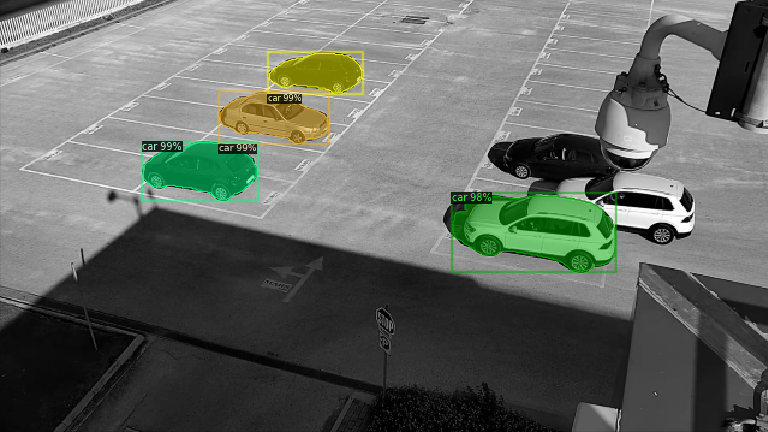

Number of INTERESTING objects found in 'parking-space/Videos/frames/frame1128.png' = 4
Found Car in Parking Space --> Row = 2 :: Slot = 5
Found Car in Parking Space --> Row = 2 :: Slot = 3
Found Car in Parking Space --> Row = 2 :: Slot = 1
Found Car in Parking Space --> Row = 3 :: Slot = 1
Number of INTERESTING objects found in 'parking-space/Videos/frames/frame1152.png' = 4
Found Car in Parking Space --> Row = 2 :: Slot = 5
Found Car in Parking Space --> Row = 2 :: Slot = 3
Found Car in Parking Space --> Row = 2 :: Slot = 1
Found Car in Parking Space --> Row = 3 :: Slot = 1
Number of INTERESTING objects found in 'parking-space/Videos/frames/frame1176.png' = 4
Found Car in Parking Space --> Row = 2 :: Slot = 5
Found Car in Parking Space --> Row = 2 :: Slot = 3
Found Car in Parking Space --> Row = 2 :: Slot = 1
Found Car in Parking Space --> Row = 3 :: Slot = 1
Number of INTERESTING objects found in 'parking-space/Videos/frames/frame1200.png' = 4
Found Car in Parking Space --> Row = 2 :

In [ ]:
from time import sleep
 
# Extracted parking-space frames
all_frames = !(ls {OUTPUT_FRAMES_PATH}/*.png)
#all_frames = ['/content/parking-space/Videos/frames/diff_0_24.png']

if "cannot access" in all_frames[0]:
  # Problem with frames listing - Aborting !
  raise Exception( "Problem with Parking-Space Frames Reading !" )
  
video_lab = []

# Start reading each frame and process it
for frame_xx in all_frames:
  #print(frame_xx)
  
  # *************    Detect objects in frame_XX    ******************
  frame_num, curr_bboxes_arr, curr_classes_arr, lines, slots, dists = process_parking_frame( frame_xx )
  # *****************************************************************
  
  frame_dict = { 'frame-number' : frame_num }

  frame_dict.update( {'objects-num': len(curr_classes_arr)} )

  frame_dict.update( {'objects-labels' : curr_classes_arr} )
  frame_dict.update( {'bboxes': curr_bboxes_arr} )

  parking = []
  for ic in range( 0, len(lines) ) :
    parking.append( str(lines[ic]) + ' , ' + str(slots[ic]) + ' / '+ str(dists[ic]) )
  
  frame_dict.update( {'parking': parking} )
  #print( curr_bboxes_arr.__class__ )  --> list
  #print( curr_classes_arr.__class__ ) --> list
  #sleep(0.1)

  video_lab.append( frame_dict )

In [ ]:
!ls {OUTPUT_FRAMES_PATH}/*.png

ls: cannot access '/content/parking-space/Videos/frames/*.png': No such file or directory


# **LOCALIZATION AND TRACKING CODE**
Found New Car Entering the Parking Space & Follow It

---

Utility Function: Compute distance between two rectangles

In [ ]:
all_parking_slots

[['01', ' 01', ' 18-142', ' 111-161', ' 149-135', ' 55-118'],
 ['01', ' 02', ' 55-118', ' 149-135', ' 174-112', ' 87-99'],
 ['01', ' 03', ' 87-99', ' 174-112', ' 197-93', ' 116-80'],
 ['01', ' 04', ' 116-80', ' 197-93', ' 223-76', ' 143-64'],
 ['01', ' 05', ' 143-64', ' 223-76', ' 249-58', ' 166-51'],
 ['01', ' 06', ' 166-51', ' 249-58', ' 262-45', ' 187-38'],
 ['01', ' 07', ' 187-38', ' 262-45', ' 278-33', ' 206-27'],
 ['01', ' 08', ' 206-27', ' 278-33', ' 295-22', ' 225-16'],
 ['01', ' 09', ' 225-16', ' 295-22', ' 306-13', ' 242-7'],
 ['02', ' 01', ' 109-160', ' 217-183', ' 245-152', ' 144-132'],
 ['02', ' 02', ' 144-132', ' 245-152', ' 271-127', ' 175-111'],
 ['02', ' 03', ' 175-111', ' 271-127', ' 293-105', ' 201-90'],
 ['02', ' 04', ' 201-90', ' 293-105', ' 312-85', ' 222-75'],
 ['02', ' 05', ' 222-75', ' 312-85', ' 326-69', ' 248-58'],
 ['02', ' 06', ' 245-58', ' 326-69', ' 340-55', ' 263-44'],
 ['02', ' 07', ' 263-44', ' 340-55', ' 356-41', ' 280-33'],
 ['02', ' 08', ' 280-33', 

# WRITE CODE **HERE**

In [ ]:
CAR_SLOT_DISTANCE_THRESHOLD = 100

In [ ]:
import numpy as np
import torch

CAR_class_index = 2
PERSON_class_index = 0
BACKPACK_class_index = 25

FRAME_0 = 1080
FRAME_1 = 1088
FRAME_2 = 1096
FRAME_3 = 1104
FRAME_4 = 1112
FRAME_5 = 1120
FRAME_6 = 1128
FRAME_7 = 1136

KEEP_LAST_POS = 10

dim_1 = 10 # How many interesting objects / Frame

dim_2 = 5 # Features / Object
# Frame, Class, Center_X, Center_Y, Area, 

history = torch.zeros(KEEP_LAST_POS, dim_1, dim_2)
#print( history )

def frame_close_inspection_torch( frame_num ):
  frame_num = int(frame_num)
  
  # Read the interesting frame
  img = cv2.imread( "parking-space/Videos/frames-all/frame" + str(frame_num) + ".png" )
  
  # Apply ML-predictor
  outputs = predictor(img)
  
  # *** Get BOUNDING-BOXES of interesting objects ***
  output_pred_boxes = outputs["instances"].pred_boxes
  print( 'Number of Detected Objects @%d = %d' % (frame_num, len(output_pred_boxes)) )
  print( output_pred_boxes )
  
  # Calculate Distance Between Cars in Row 3
  #box_A = output_pred_boxes[3]
  #box_B = output_pred_boxes[4]
  #print( "Ready to Compute Distance Between Parked ..." )
  #compute_distance_between_two_rectangles( box_A, box_B )

  return

#frame_close_inspection_torch(1070)
#frame_close_inspection_torch(1072)
#frame_close_inspection_torch(1074)
#frame_close_inspection_torch(1076)
#frame_close_inspection_torch(1078)
#frame_close_inspection_torch(1080)
#frame_close_inspection_torch(1082)
#frame_close_inspection_torch(1084)
#frame_close_inspection_torch(1086)
#frame_close_inspection_torch(1088)
#frame_close_inspection_torch(1090)
#frame_close_inspection_torch(1092)
#frame_close_inspection_torch(1094)
#frame_close_inspection_torch(1096)
#frame_close_inspection_torch(1098)
#frame_close_inspection_torch(1100)
#frame_close_inspection_torch(1102)
#frame_close_inspection_torch(1104)
#frame_close_inspection_torch(1106)
#frame_close_inspection_torch(1108)
#frame_close_inspection_torch(1110)
#frame_close_inspection_torch(1112)
#frame_close_inspection_torch(1114)
#frame_close_inspection_torch(1116)
#frame_close_inspection_torch(1118)
#frame_close_inspection_torch(1120)
#frame_close_inspection_torch(1122)
#frame_close_inspection_torch(1124)
#frame_close_inspection_torch(1126)
#frame_close_inspection_torch(1128)
#frame_close_inspection_torch(1130)
#frame_close_inspection_torch(1132)
#frame_close_inspection_torch(1134)





In [ ]:
def is_parking_slot_too_distant( category, dist ):
  if category is 2 and dist > CAR_SLOT_DISTANCE_THRESHOLD:
    # It is a car and it is NOT close to a parking slot ( DIST > THRESH )
    return True

  # Car-Slot Distance < THRESH
  return False

def find_closest_objects( my_instance, all_bboxes ):
  for bbx in all_bboxes:
    compute_distance_between_two_rectangles( bbx, my_instance )
    
  return

def is_slot_between_two_reserved():
  return

def find_previous_state_of_instance():
  return

In [ ]:
# ***************************
# CORRECT PARKING PREDICTIONS
# ***************************
def correct_parking_slot_predictions():
  CAR_INDEX = 2

  # Start Reading Video Predictions History
  num_frames = len( video_lab )

  print('Ready to Evaluate Predictions for %d Frames !' % num_frames )

  for i in range( 0, len(video_lab) ):
    # The collection of data for Frame-XXX
    frame_dict = video_lab[ i ]

    # Read <Frame-Number>
    frame_num = frame_dict.get( 'frame-number' )
    #print( 'Handling Frame ... %d' % frame_num )

    # How Many Objects Detected in Frame ?
    objects_num = frame_dict.get( 'objects-num' ) 
    #print( "Number of Detected Objects = %d" % objects_num )

    # Labels of Detected Objects
    labels = frame_dict.get( 'objects-labels' )
    labels_str = [class_names[il] for il in labels]
    #print( ' , '.join( labels_str ) )
    
    # The <Bounding-Boxes> around detected objects 
    frame_bboxes = frame_dict.get( 'bboxes' )
    
    # Positions of Parked Cars = Line , Cell / Distance 
    parking = frame_dict.get( 'parking' )
    #print( parking )

    for ii in range( 0, objects_num ):
      my_label = int( labels[ii] )

      my_bbox = frame_bboxes[ii]

      my_space = parking[ii]
      
      my_line_full = my_space.split('/') 
      
      dist = float( my_line_full[1] )
      
      # XRow , XSlot/ Distance
      my_line = my_line_full[0]
      my_line = my_line.split( ',' )

      row  = int(my_line[0])
      cell = int(my_line[1])
      
      #print( "Detected Object --> Label = %d , Row = %d , Cell = %d , Dist = %f" % (my_label, row, cell, dist) )

      # Check distances of objects from parking-slots ?
      #   In case of long-distance ... Indicate a PROBLEM
      is_far = is_parking_slot_too_distant( my_label, dist )
      if is_far:
        # Found an interesting object that is located far from parking area
        print( "** Big Object-Slot Distance @Frame = %s" % (frame_num) )
        print( "** Parking Slot Assignment Not Accurate ... Label = %d , Row = %d , Cell = %d , Dist = %f" % (my_label, row, cell, dist) )
        print( "** Probably a New Car that is Moving !" )

        #frame_dict.update( {'parking': None} )
        #video_lab[i] = frame_dict

        find_closest_objects( my_bbox, frame_bboxes )
        
        #for slot in parking:
        #  print( slot )
  return

# ***************************************************************
# Call the function that evaluates assigned parking slots to cars
# ***************************************************************
correct_parking_slot_predictions()

Ready to Evaluate Predictions for 190 Frames !
** Big Object-Slot Distance @Frame = 1080
** Parking Slot Assignment Not Accurate ... Label = 2 , Row = 3 , Cell = 3 , Dist = 143.654316
** Probably a New Car that is Still Moving !
Not a Torch::Tensor Object !
Not a Torch::Tensor Object !
Not a Torch::Tensor Object !
Not a Torch::Tensor Object !
Not a Torch::Tensor Object !
Not a Torch::Tensor Object !
** Big Object-Slot Distance @Frame = 4008
** Parking Slot Assignment Not Accurate ... Label = 2 , Row = 3 , Cell = 1 , Dist = 137.486590
** Probably a New Car that is Still Moving !
Not a Torch::Tensor Object !
Not a Torch::Tensor Object !
Not a Torch::Tensor Object !
Not a Torch::Tensor Object !
Not a Torch::Tensor Object !


In [ ]:
# HANDLE HIDDEN OBJECTS
def handle_num_objects_smaller():
  return

In [ ]:
video_lab[139]

{'bboxes': [array([223.52348,  43.37818, 302.28433,  78.69014], dtype=float32),
  array([182.09024 ,  75.94429 , 274.67755 , 120.827805], dtype=float32),
  array([117.397514, 116.67614 , 215.64223 , 167.6328  ], dtype=float32),
  array([376.0221 , 160.03848, 514.0179 , 227.79152], dtype=float32),
  array([245.28316, 223.37231, 380.6611 , 306.01938], dtype=float32)],
 'frame-number': 4008,
 'objects-labels': array([2, 2, 2, 2, 2]),
 'objects-num': 5,
 'parking': None}

In [ ]:
import torch

def compute_distance_between_two_rectangles(rect_A, rect_B):
  
  if rect_A.__class__ is not torch.tensor:
    print('Not a Torch::Tensor Object !')
    return
    
  center_A = rect_A.get_centers()
  bbox_A = torch.Tensor()
  for box in rect_A:
    # Torch.Tensor
    bbox_A = box 

  center_B = rect_B.get_centers()
  bbox_B = torch.Tensor()
  for box in rect_B:
    # Torch.Tensor
    bbox_B = box 

  dist = torch.cdist(center_A, center_B, p=2).numpy()

  #print( "Ready to Compute Distance Between Two(2) Rectangles:" )
  #print( "Center-A:" )
  #print( " --> " + str( center_A ) )

  #print( "Center-B:" )
  #print( " --> " + str( center_B ) )

  print( "DISTANCE-BETWEEN-CARS = " + str(dist) )

Utility Function: Is there a free-slot in front of the moving car ?

In [ ]:
def is_free_slot_available_in_front(bbox_A, bbox_B):
  print( "Ready to Find Distance Between Boxes:" )
  print( "Box-A" )
  print( "Box-B" )

In [ ]:
!pip install scipy

# **!!! MISSING CARS !!!**
After MASK-RCNN applied to contents of Video/ frames ... Read Dictionary with Objects-Detected
  
Interesting Cases:
*   Number of Cars in Frame {t1}
*   Is LOWER than NumCars in Frame {t0}

Locate such cases ..



In [ ]:
# **********************************************************
# Use Torch functions for Matrix computations ...
#
# Efficient evaluation of:
#  (1) Moving Objects in Frame Sequences
# **********************************************************
CAR_MOVING_DIFF_THRESH = 2
CAR_MISSING_DIF_THRESH = 50

all_frame_nums = []
all_frame_nums.append( [x.get('frame-number') for x in video_lab] )
#print( all_frame_nums )

def frame_close_inspection_torch_4moving( frames_list ):
  #print( frames_list.__class__ )
  
  # Tensors with Previous-Frames Values:
  #   1) Centers of Bounding-Boxes
  #   2) Areas of Bounding-Boxes
  previous_frames_centers = torch.Tensor()
  previous_frames_areas   = torch.Tensor()
  previous_frames_status  = []

  jp_boxes = None
  jp_centers = torch.Tensor()
  jp_areas   = torch.Tensor()
  
  for frame in frames_list:
    # MATRIX COMPUTATIONS @FRAME
    # --------------------------
    #print( frame.__class__ )
    
    try:
      indx = all_frame_nums.index( frame )

      print( 'Frame in List of Previous .... From BASIC framerate - Skip it = ' + frame + ' !' )

      # Skip this frame ... Not from "Finer-Details" folder
      continue
    except ValueError as ve: 
      # Frame from ALLs
      # Not Yet Processed from Predictor
      #print( "@" + frame )
        
      # Read frame from ALLs
      img = cv2.imread( "parking-space/Videos/frames-all/frame" + frame + ".png" )

      # Apply ML-predictor
      outputs = predictor( img )      

      v = Visualizer( img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2 )
      # Draw Prediction Masks
      v.draw_instance_predictions(outputs["instances"].to("cpu"))

      # Show ONLY Prediction-Masks ?
      #out = v.get_output()
      #cv2_imshow( out.get_image() )
  
      # *** Get BOUNDING-BOXES of interesting objects ***
      outputs_pred_boxes = outputs[ "instances" ].pred_boxes
      len_boxes = len( outputs_pred_boxes )
      print( "@%s --> number of detected objs = %d" % (frame, len_boxes) )
      #print( outputs_pred_boxes )
      
      # *** Get CENTERS && AREAS of BoundingBoxes
      pred_boxes_centers = outputs_pred_boxes.get_centers()
      pred_boxes_areas   = outputs_pred_boxes.area()
      
      pred_boxes_centers_ = pred_boxes_centers.numpy().tolist()
      pred_boxes_areas_   = pred_boxes_areas.numpy().tolist()

      #print( pred_boxes_centers_ )
      #print( pred_boxes_areas_ )

      pred_boxes_status  = ["Parked" for x in range( len_boxes )]

      # Append Centers & Areas ... HISTORY_TENSOR = [previous] + [this-frame]
      previous_frames_centers = torch.cat( [previous_frames_centers, pred_boxes_centers], dim=0 )
      previous_frames_areas   = torch.cat( [previous_frames_areas, pred_boxes_areas] )
      
      # 
      # Differences with Previous Frame ... Is car moving ?
      # 
      if (jp_centers.numel() > 0) and (jp_areas.numel() > 0):
        # Previous-Frame Tensors ... They Have Data

        # Compute Distane ... SOS is (PREVIOUS - CURRENT)
        if len(outputs_pred_boxes) >= len(jp_boxes):
          diff_centers = torch.cdist( pred_boxes_centers, jp_centers )
        else:
          diff_centers = torch.cdist( jp_centers, pred_boxes_centers )

        #diff_areas   = torch.cdist( torch.unsqueeze(pred_boxes_areas, 0), jp_areas )

        print( diff_centers )
        #print( diff_areas )

        min_elem_diff_centers = torch.min(diff_centers, dim=1)
        
        values  = min_elem_diff_centers[0]
        #print( values )

        indices = min_elem_diff_centers[1] 

        valuesArr = values.numpy().tolist()
          
        moving_boxes = []
        for iv in range( 0, len(valuesArr) ):
          if valuesArr[iv] > CAR_MOVING_DIFF_THRESH:
            # Found a moving object ... BBox NOT CLOSE to previous ones
            print( "Bounding Box is New or Moving ... %d = %f" % (iv, valuesArr[iv]))
            
            # Crazy Idea .. Convert Detectron2::Boxes 2 List
            t0_num_objs  = len( jp_boxes )
            t1_num_objs = len( outputs_pred_boxes )

            if t1_num_objs > t0_num_objs:
              for box_x in outputs_pred_boxes[ iv ]:
                music_box = box_x.tolist()
              
              new_obj_center = pred_boxes_centers[ iv ]
              
              new_obj_text = "New"
              pred_boxes_status[ iv ] = "New"
            
            elif t1_num_objs == t0_num_objs:
              for box_x in outputs_pred_boxes[ iv ]:
                music_box = box_x.tolist()
              
              new_obj_center = pred_boxes_centers[ iv ]
              new_obj_text = "Moving@" + str(valuesArr[iv])

              pred_boxes_status[ iv ] = new_obj_text
            else:
              # t1_num_objs < t0_num_objs
              num_missing_objs = t0_num_objs - t1_num_objs

              #s_ortV = valuesArr
              #s_ortV.sort()

              #missin_g = s_ortV[0: num_missing_objs-1]
              #movin_g  = s_ortV[num_missing_objs: ]

              for box_x in jp_boxes[ iv ]:
                music_box = box_x.tolist()
              
              new_obj_center = jp_centers[ iv ]
              
              #if valuesArr[iv] in missin_g:
              #  new_obj_text = "Disappeared"
              #elif valuesArr[iv] in movin_g:
              #  new_obj_text = "Moving"
              #else:
              #  new_obj_text = "UFO"

              if valuesArr[iv] > CAR_MISSING_DIF_THRESH:
                new_obj_text = "Disappeared"
              else:
                new_obj_text = "Moving"
                #pred_boxes_status[ iv ] = new_obj_text

            # @@@@@ ********* VISUALIZER *********  @@@@
            # @@@@ # Draw a Box with a Lebal INSIDE @@@@
            # @@ ************************************ @@
            v.draw_box( music_box, edge_color='b', line_style='--' )
            v.draw_text( new_obj_text, new_obj_center, font_size=14 )
            
        pred_boxes_status_dict  = {
            'frame': frame,
            'status': pred_boxes_status,
            'areas': pred_boxes_areas_,
            'centers': pred_boxes_centers_
        } 

        previous_frames_status.append( pred_boxes_status_dict )

        #next_music_box = torch.add( box_x, torch.Tensor([-120, -25, -60, -10]) )
        #v.draw_box( next_music_box.tolist(), edge_color='r', line_style='--' )
  
        #out = v.get_output()
        #cv2_imshow( out.get_image() )

        #v.draw_box( next_music_box.tolist(), edge_color='r', line_style='--' )
        #out = v.get_output()
        #cv2_imshow( out.get_image() )
        
        #smart = torch.ones(values.size()) * (-1)
        #print( smart )
        #largeV =  values[ values > 1 ]
        #s = torch.where( values > 1, indices, -1 )
        #print(s)

      out = v.get_output()
      cv2_imshow( out.get_image() )
  
      jp_centers = pred_boxes_centers
      jp_boxes = outputs_pred_boxes
      tt = torch.tensor( pred_boxes_areas )
      jp_areas = torch.unsqueeze( tt, 0 )     
      
    ##EndOf "for frame in Frames" 
      
    # Having Tensors with Bounding-Boxes Data ... Previous XX Frames
    #print( previous_frames_centers )
    #print( previous_frames_areas )  
  print( previous_frames_status )  
  
  # Calculate Distance Between Cars in Row 3
  #box_A = output_pred_boxes[3]
  #box_B = output_pred_boxes[4]
  #print( "Ready to Compute Distance Between Parked ..." )
  #compute_distance_between_two_rectangles( box_A, box_B )

# Result is 
#tensor([[7.1647e-02, 5.0756e+01, 1.2607e+02, 2.1419e+02, 2.2393e+02],
#        [5.0554e+01, 1.5129e-01, 7.6100e+01, 2.3782e+02, 2.3480e+02],
#        [1.2567e+02, 7.5664e+01, 8.7887e-01, 2.9684e+02, 2.8130e+02],
#        [2.1401e+02, 2.3775e+02, 2.9645e+02, 1.6225e-01, 6.1143e+01],
#        [3.5736e+02, 3.7903e+02, 4.3220e+02, 1.4320e+02, 1.5362e+02],
#        [2.2344e+02, 2.3444e+02, 2.8053e+02, 6.0989e+01, 4.4946e-01]])
# Each Row has ONLY ONE element e-02 ... distance of bbox from ITSELF
# only rOW#05 is VERY distant from EXISTINGS .. all are e+02
# BBOX 5 is NEW OBJECT

# Sum of distances of ... First Detected Object ... from All Other
#s = torch.sum( diff_centers[0] )
#print( s )

# Sum of distances of ... Second Detected Object ... from All Other
#s = torch.sum( diff_centers[1] )
#print( s )

# Sum of distances of ... Third Detected Object ... from All Other
#s = torch.sum( diff_centers[2] )
#print( s )

# Sum of distances of ... Forth Detected Object ... from All Other
#s = torch.sum( diff_centers[3] )
#print( s )

# Sum of distances of ... Fifth Detected Object ... from All Other
#s = torch.sum( diff_centers[4] )
#print( s )

# Sum of distances of ... Sixth Detected Object ... from All Other
#s = torch.sum( diff_centers[5] )
#print( s )

# SOS ... Torch offers Tensor Computations ... Distance of every tensor element from other ... From A to B
####s = torch.sum( diff_centers, 1 )
####print( 'Eigen-Array: Between All Objects Distances ... ' ) 
####print( s )

# SOS 2 ... What is the more distant object
####max_i = torch.argmax( s )
####max_i = max_i.item()      # Convert from Torch:Tensor to "int"

# DETECTOR DETECTS ALL CARS PER FRAME 
### MANAGED TO LOCATE THE NEW CAR THAT HAS JUST ENTERED THE PARKING SPACE
##### NEED TO STORE THE CLASS OF NEW OBJECT IN CASE OF FUTURE PROBLEMS WITH OCCLUSIONS 
#print( frame_bboxes.tocpu().numpy() )
####new_obj_bbox = frame_bboxes.__getitem__( max_i ) 

####print( "Centers of BBoxes-Detected-Objects are: ")
####print( centers )

# Compute distance between all BoundingBoxes - using centers
#####between_centers = torch.cdist(centers, centers )
#####print( "Centers Between All Detected Objects in Frame: " )
#####print( between_centers )
#####print( "Distances of New Object from Remainings in this Frame: " )
#####print( between_centers[max_i] )

#boxes_1d = torch.zeros(1, 4)
#boxes_1d[0, :] = next_music_box[::]
#test_boxes_1d = Boxes.__init__( torch.Tensor(next_music_box.tolist() ) )
#test_boxes_1d = Boxes( boxes_1d )


  return


# **Finer Detail Needed**
In case of missing car in FRAMERATE each_every 8 ...
Go to ALL_FRAMES and observe what is happening in FRAMERATE each_every 2 ...

In [ ]:
!rm parking-space/Videos/frames-all/masked*.png

In [ ]:
# List of filenames
FRAMES_ALL_FOLDER = 'parking-space/Videos/frames-all'
frames_all = !ls {FRAMES_ALL_FOLDER}/*.png

# List of number-tags in filenames: frameXXXX.png 
MY_TAG = -1000
number_tags = !ls {FRAMES_ALL_FOLDER}/*.png |grep -o "[0-9]\+" |sort -n

# **********************************************************
#  While Processing a frame with number XXXX
#    Find a list of previous frames for better understanding ...
#      list-length = 4 - 12
#
#  Return : List of Previous-Frames
# ***********************************************************
def check_history_from_all( frame_num, history_size ):
  # On the safe side ... Be assured that string is provided for frame-num
  frame_num = str( frame_num )

  if int(frame_num) != 1104:
    print( "In DEBUG Mode: Running Few Laps Only !" )
    return

  for frame in frames_all:
    if ("frame" + frame_num + ".png") in frame:
      MY_TAG = frame_num
      break
    else:
      for ii in range( 0, len(number_tags) ):
        tag = number_tags[ii]

        if tag > frame_num: 
          MY_TAG = number_tags[ii-1]
          break      

  # List of previous frames with FINER framerate
  mt = number_tags.index( MY_TAG )
  interframes = number_tags[mt-history_size: mt]
  print( interframes )

  # Send list for extraction of important results : Any Moving Objects ?
  frame_close_inspection_torch_4moving( interframes )
  
  return

Control Center for Missing Cars

Ready to Examine Variations in Number of Detected Objects ... 
  --> Decreases Between Consecutive Frames
  --> Objects Left or Hidden by Another One ?
!!! Number of Detected Cars is Dropped !!!
   @Frame-1104 : CURRENT / PREVIOUS = 4 / 6
['1068', '1070', '1072', '1074', '1076', '1078', '1080', '1082', '1084', '1086', '1088', '1090', '1092', '1094', '1096', '1098', '1100', '1102']
@1068 --> number of detected objs = 5


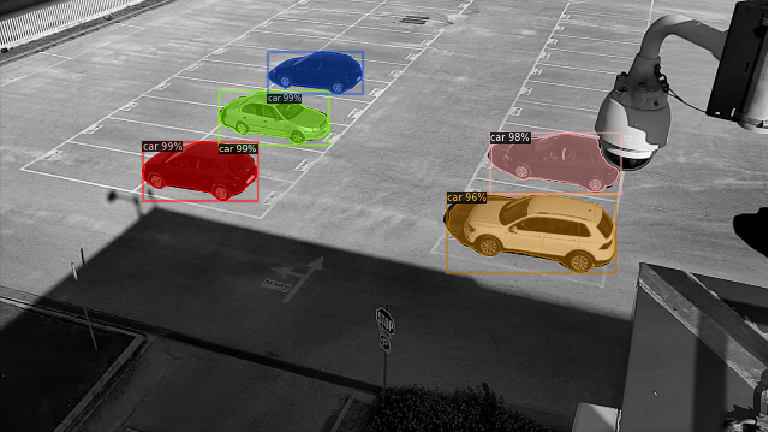

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:198: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).


@1070 --> number of detected objs = 5
tensor([[2.1047e-04, 5.0655e+01, 1.2603e+02, 2.1407e+02, 2.2385e+02],
        [5.0648e+01, 1.7593e-02, 7.6012e+01, 2.3775e+02, 2.3473e+02],
        [1.2611e+02, 7.6095e+01, 1.0349e-01, 2.9662e+02, 2.8090e+02],
        [2.1401e+02, 2.3771e+02, 2.9645e+02, 6.8752e-02, 6.1274e+01],
        [2.2394e+02, 2.3487e+02, 2.8095e+02, 6.1202e+01, 1.7012e-01]])


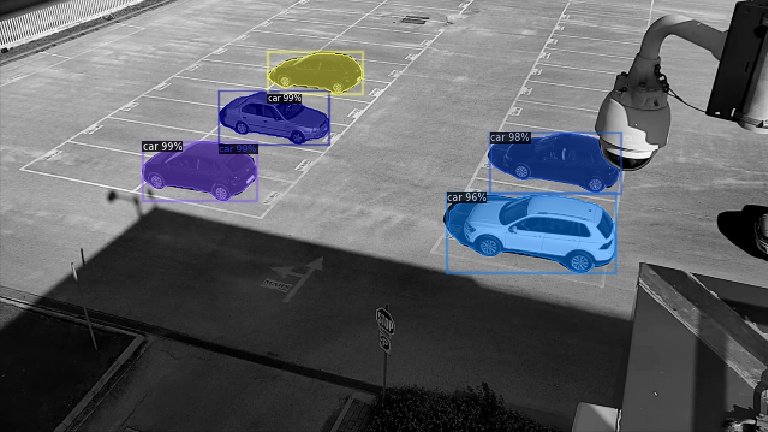

@1072 --> number of detected objs = 5
tensor([[3.8391e-03, 5.0645e+01, 1.2611e+02, 2.1401e+02, 2.2393e+02],
        [5.0620e+01, 3.8117e-02, 7.6128e+01, 2.3769e+02, 2.3487e+02],
        [1.2564e+02, 7.5694e+01, 9.1341e-01, 2.9667e+02, 2.8135e+02],
        [2.1410e+02, 2.3778e+02, 2.9665e+02, 9.3949e-02, 6.1175e+01],
        [2.2381e+02, 2.3472e+02, 2.8091e+02, 6.1167e+01, 1.3423e-01]])


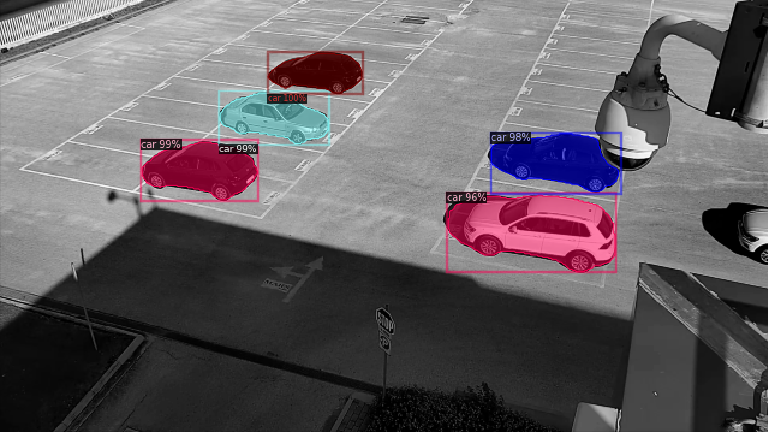

@1074 --> number of detected objs = 5
tensor([[4.0740e-02, 5.0642e+01, 1.2565e+02, 2.1412e+02, 2.2384e+02],
        [5.0614e+01, 5.4575e-02, 7.5730e+01, 2.3774e+02, 2.3468e+02],
        [1.2566e+02, 7.5742e+01, 2.6965e-02, 2.9679e+02, 2.8123e+02],
        [2.1396e+02, 2.3764e+02, 2.9661e+02, 1.5225e-01, 6.1121e+01],
        [2.2383e+02, 2.3476e+02, 2.8125e+02, 6.1148e+01, 4.4405e-02]])


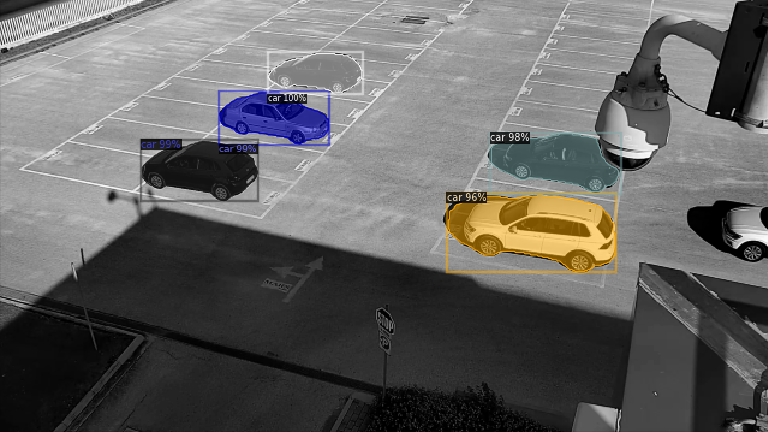

@1076 --> number of detected objs = 6
tensor([[2.5707e-02, 5.0621e+01, 1.2567e+02, 2.1397e+02, 2.2384e+02],
        [5.0603e+01, 4.9469e-02, 7.5786e+01, 2.3760e+02, 2.3473e+02],
        [1.2605e+02, 7.6056e+01, 9.1593e-01, 2.9639e+02, 2.8085e+02],
        [2.1410e+02, 2.3770e+02, 2.9674e+02, 1.1696e-01, 6.1073e+01],
        [3.6885e+02, 3.9041e+02, 4.4387e+02, 1.5487e+02, 1.6461e+02],
        [2.2371e+02, 2.3456e+02, 2.8113e+02, 6.1047e+01, 1.5058e-01]])
Bounding Box is New or Moving ... 4 = 154.870026


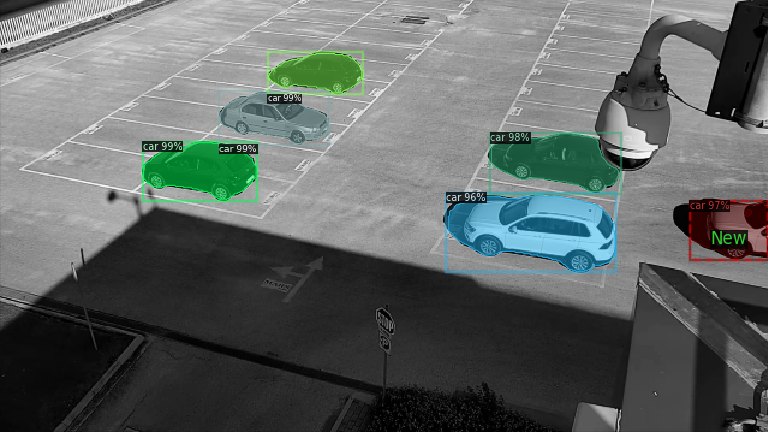

@1078 --> number of detected objs = 6
tensor([[4.2575e-02, 5.0582e+01, 1.2603e+02, 2.1413e+02, 3.6888e+02, 2.2373e+02],
        [5.0587e+01, 7.6602e-03, 7.6085e+01, 2.3771e+02, 3.9042e+02, 2.3458e+02],
        [1.2605e+02, 7.6103e+01, 1.8456e-02, 2.9651e+02, 4.4353e+02, 2.8073e+02],
        [3.5908e+02, 3.8061e+02, 4.3381e+02, 1.4500e+02, 9.8139e+00, 1.5529e+02],
        [2.1414e+02, 2.3776e+02, 2.9654e+02, 5.2445e-02, 1.5470e+02, 6.1019e+01],
        [2.2360e+02, 2.3453e+02, 2.8071e+02, 6.0843e+01, 1.6471e+02, 1.9051e-01]])
Bounding Box is New or Moving ... 3 = 9.813860


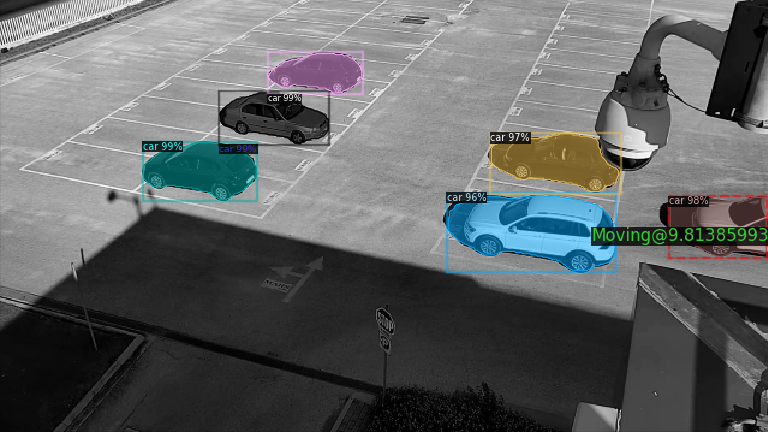

@1080 --> number of detected objs = 6
tensor([[3.5492e-02, 5.0607e+01, 1.2607e+02, 3.5909e+02, 2.1415e+02, 2.2361e+02],
        [5.0583e+01, 9.3202e-03, 7.6102e+01, 3.8062e+02, 2.3776e+02, 2.3453e+02],
        [1.2569e+02, 7.5815e+01, 8.7389e-01, 4.3415e+02, 2.9678e+02, 2.8111e+02],
        [2.1407e+02, 2.3765e+02, 2.9645e+02, 1.4506e+02, 1.1205e-01, 6.0848e+01],
        [3.5742e+02, 3.7893e+02, 4.3220e+02, 1.7095e+00, 1.4325e+02, 1.5374e+02],
        [2.2351e+02, 2.3436e+02, 2.8054e+02, 1.5546e+02, 6.0940e+01, 1.9914e-01]])


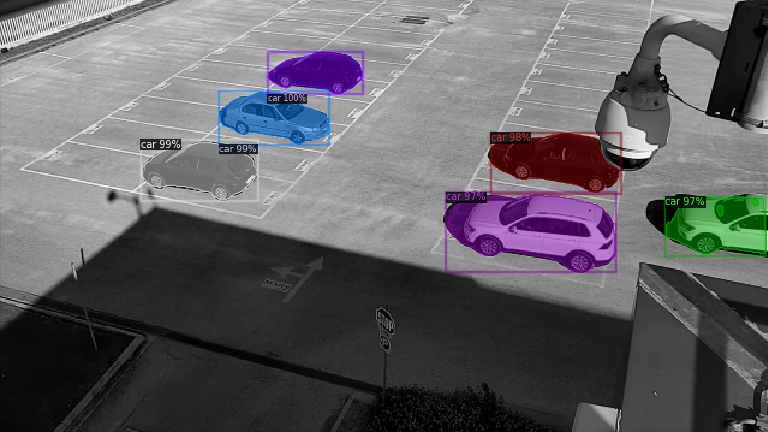

@1082 --> number of detected objs = 6
tensor([[1.2650e-02, 5.0605e+01, 1.2571e+02, 2.1405e+02, 3.5739e+02, 2.2350e+02],
        [5.0629e+01, 2.6203e-02, 7.5789e+01, 2.3768e+02, 3.7896e+02, 2.3439e+02],
        [1.2574e+02, 7.5834e+01, 4.5983e-02, 2.9667e+02, 4.3252e+02, 2.8091e+02],
        [3.5165e+02, 3.7336e+02, 4.2721e+02, 1.3762e+02, 5.7999e+00, 1.4900e+02],
        [2.1420e+02, 2.3784e+02, 2.9688e+02, 2.0355e-01, 1.4320e+02, 6.1074e+01],
        [2.2422e+02, 2.3522e+02, 2.8184e+02, 6.0631e+01, 1.5300e+02, 9.3132e-01]])
Bounding Box is New or Moving ... 3 = 5.799880


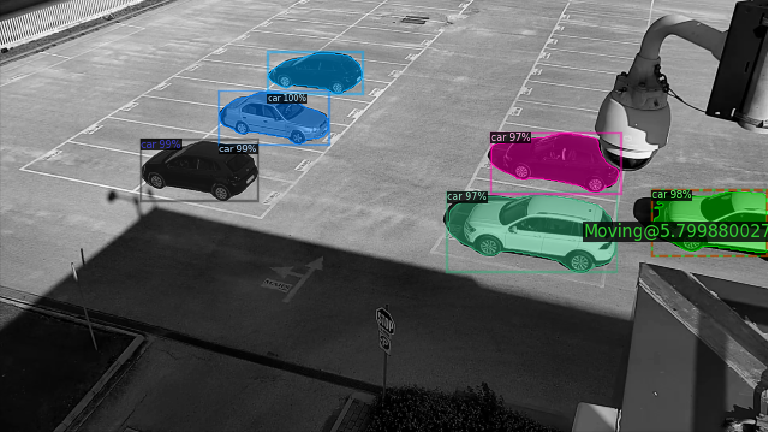

@1084 --> number of detected objs = 6
tensor([[1.3701e-02, 5.0626e+01, 1.2574e+02, 3.5165e+02, 2.1420e+02, 2.2422e+02],
        [5.0615e+01, 1.2921e-02, 7.5822e+01, 3.7337e+02, 2.3785e+02, 2.3523e+02],
        [1.2572e+02, 7.5799e+01, 2.8312e-02, 4.2721e+02, 2.9688e+02, 2.8184e+02],
        [3.5048e+02, 3.7211e+02, 4.2586e+02, 1.4071e+00, 1.3628e+02, 1.4668e+02],
        [2.1449e+02, 2.3814e+02, 2.9714e+02, 1.3718e+02, 2.7777e-01, 6.0756e+01],
        [2.2389e+02, 2.3489e+02, 2.8150e+02, 1.4836e+02, 6.0681e+01, 3.4488e-01]])


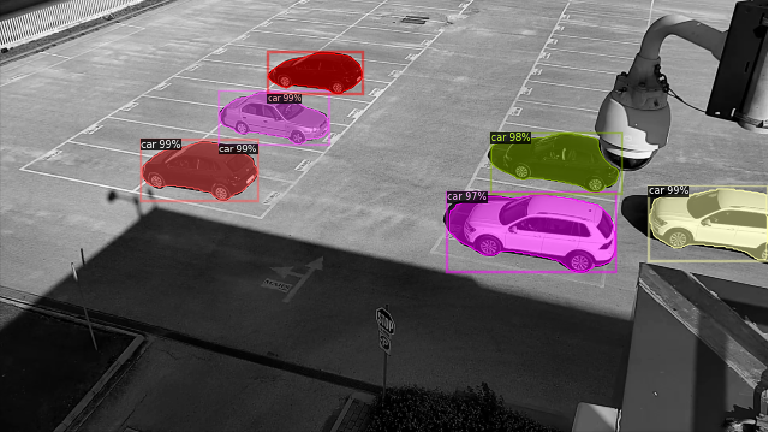

@1086 --> number of detected objs = 6
tensor([[2.9909e-03, 5.0615e+01, 1.2573e+02, 3.5046e+02, 2.1447e+02, 2.2388e+02],
        [5.0620e+01, 6.7813e-03, 7.5805e+01, 3.7211e+02, 2.3813e+02, 2.3489e+02],
        [1.2573e+02, 7.5819e+01, 2.9107e-02, 4.2589e+02, 2.9716e+02, 2.8154e+02],
        [2.1437e+02, 2.3808e+02, 2.9714e+02, 1.3611e+02, 2.8952e-01, 6.0962e+01],
        [3.3921e+02, 3.6016e+02, 4.1342e+02, 1.2777e+01, 1.2491e+02, 1.3423e+02],
        [2.2515e+02, 2.3586e+02, 2.8210e+02, 1.4681e+02, 6.2297e+01, 1.8100e+00]])
Bounding Box is New or Moving ... 4 = 12.776875


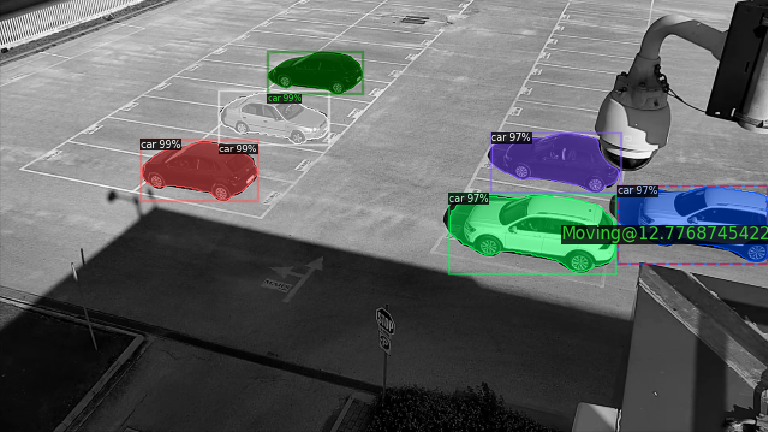

@1088 --> number of detected objs = 5
tensor([[1.7863e-02, 5.0645e+01, 1.2573e+02, 2.1405e+02, 2.2442e+02],
        [5.0639e+01, 3.2227e-02, 7.5805e+01, 2.3778e+02, 2.3521e+02],
        [1.2575e+02, 7.5794e+01, 6.9084e-03, 2.9688e+02, 2.8159e+02],
        [2.1436e+02, 2.3808e+02, 2.9716e+02, 3.1916e-01, 6.2085e+01],
        [3.3919e+02, 3.6015e+02, 4.1344e+02, 1.2535e+02, 1.3443e+02],
        [2.2515e+02, 2.3585e+02, 2.8212e+02, 6.2609e+01, 7.7754e-01]])
Bounding Box is New or Moving ... 4 = 125.349998


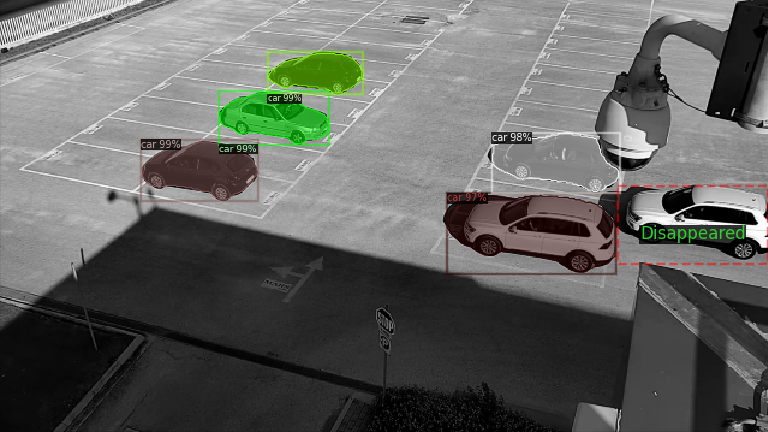

@1090 --> number of detected objs = 5
tensor([[8.2813e-03, 5.0665e+01, 1.2574e+02, 2.1405e+02, 2.2443e+02],
        [5.0659e+01, 4.2517e-03, 7.5791e+01, 2.3777e+02, 2.3520e+02],
        [1.2611e+02, 7.6077e+01, 9.3854e-01, 2.9661e+02, 2.8115e+02],
        [2.1523e+02, 2.3905e+02, 2.9820e+02, 1.3361e+00, 6.2716e+01],
        [2.2551e+02, 2.3655e+02, 2.8315e+02, 6.1196e+01, 1.7191e+00]])


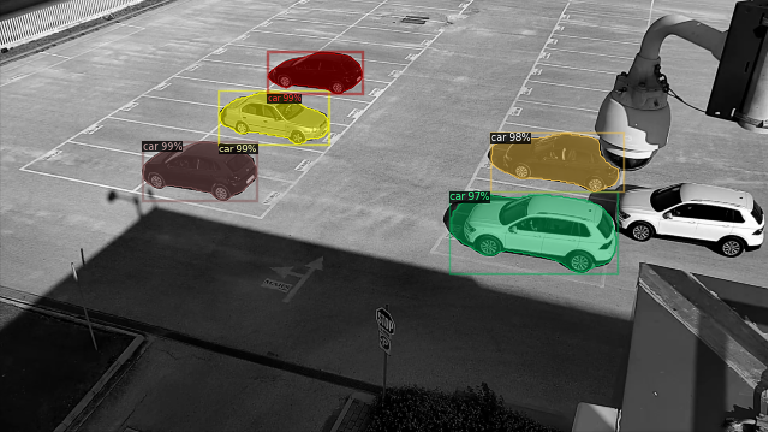

@1092 --> number of detected objs = 6
tensor([[1.2979e-02, 5.0672e+01, 1.2612e+02, 2.1522e+02, 2.2551e+02],
        [5.0662e+01, 1.3562e-02, 7.6077e+01, 2.3907e+02, 2.3656e+02],
        [1.2609e+02, 7.6064e+01, 1.6796e-02, 2.9793e+02, 2.8270e+02],
        [2.1469e+02, 2.3847e+02, 2.9733e+02, 6.1368e-01, 6.1491e+01],
        [2.2525e+02, 2.3602e+02, 2.8194e+02, 6.2827e+01, 1.2309e+00],
        [3.2772e+02, 3.4901e+02, 4.0249e+02, 1.1266e+02, 1.2319e+02]])
Bounding Box is New or Moving ... 5 = 112.663162


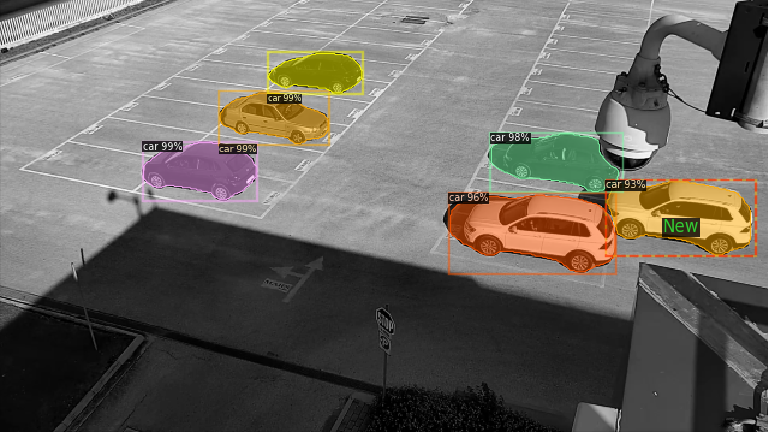

@1094 --> number of detected objs = 6
tensor([[7.8323e-03, 5.0667e+01, 1.2610e+02, 2.1469e+02, 2.2524e+02, 3.2772e+02],
        [5.0670e+01, 4.5093e-03, 7.6064e+01, 2.3847e+02, 2.3603e+02, 3.4902e+02],
        [1.2582e+02, 7.5848e+01, 9.2971e-01, 2.9765e+02, 2.8243e+02, 4.0292e+02],
        [2.1454e+02, 2.3835e+02, 2.9722e+02, 1.7564e-01, 6.2654e+01, 1.1334e+02],
        [2.2499e+02, 2.3609e+02, 2.8231e+02, 6.1147e+01, 1.4159e+00, 1.2345e+02],
        [3.1703e+02, 3.3819e+02, 3.9172e+02, 1.0261e+02, 1.1396e+02, 1.0834e+01]])
Bounding Box is New or Moving ... 5 = 10.834234


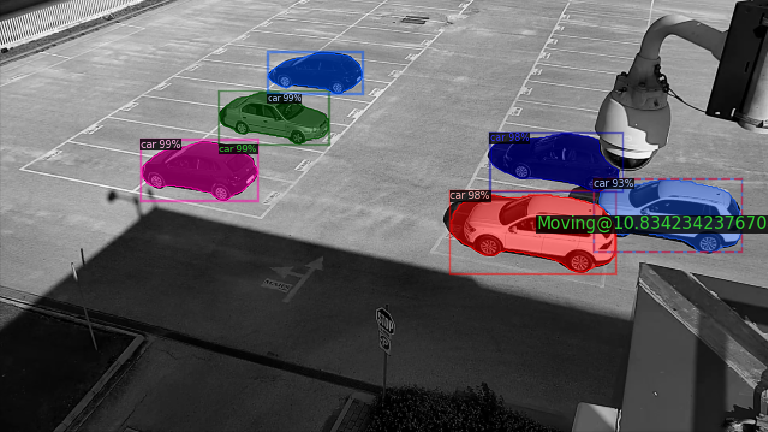

@1096 --> number of detected objs = 6
tensor([[1.4339e-02, 5.0674e+01, 1.2582e+02, 2.1453e+02, 2.2499e+02, 3.1702e+02],
        [5.0673e+01, 1.7727e-02, 7.5846e+01, 2.3834e+02, 2.3608e+02, 3.3818e+02],
        [1.2581e+02, 7.5851e+01, 1.3307e-02, 2.9754e+02, 2.8280e+02, 3.9214e+02],
        [2.1375e+02, 2.3777e+02, 2.9717e+02, 1.2473e+00, 6.2244e+01, 1.0364e+02],
        [2.2567e+02, 2.3649e+02, 2.8289e+02, 6.2623e+01, 1.3984e+00, 1.1354e+02],
        [3.1021e+02, 3.3108e+02, 3.8490e+02, 9.6120e+01, 1.0602e+02, 7.2632e+00]])
Bounding Box is New or Moving ... 5 = 7.263222


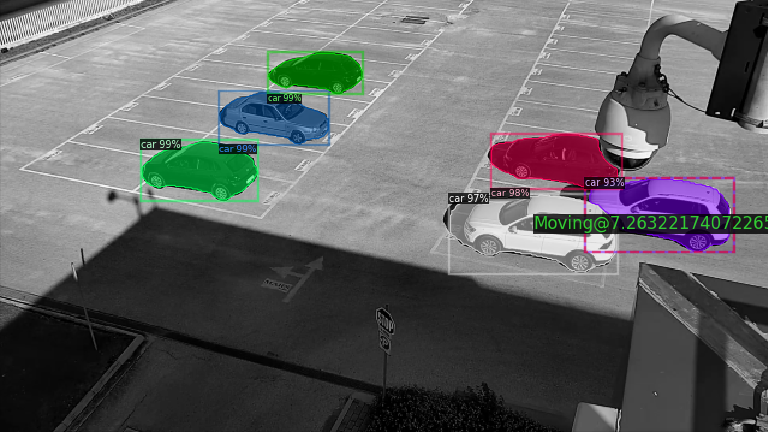

@1098 --> number of detected objs = 5
tensor([[3.5639e-03, 5.0676e+01, 1.2614e+02, 2.2550e+02, 3.0331e+02],
        [5.0682e+01, 2.4390e-02, 7.6089e+01, 2.3625e+02, 3.2412e+02],
        [1.2582e+02, 7.5848e+01, 9.1996e-01, 2.8259e+02, 3.7803e+02],
        [2.1374e+02, 2.3777e+02, 2.9687e+02, 6.3876e+01, 9.0257e+01],
        [2.2567e+02, 2.3650e+02, 2.8241e+02, 3.6552e-01, 1.0005e+02],
        [3.1020e+02, 3.3109e+02, 3.8449e+02, 1.0674e+02, 6.9509e+00]])
Bounding Box is New or Moving ... 3 = 63.875835
Bounding Box is New or Moving ... 5 = 6.950853


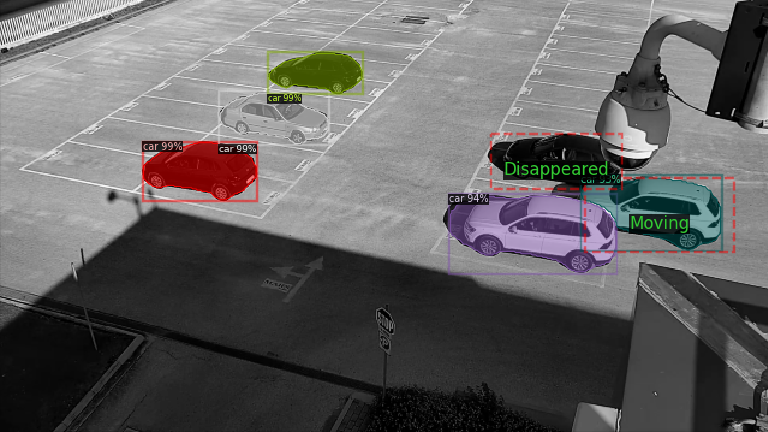

@1100 --> number of detected objs = 4
tensor([[1.5618e-01, 5.0719e+01, 1.2616e+02, 2.2482e+02],
        [5.0824e+01, 1.7145e-01, 7.6122e+01, 2.3561e+02],
        [1.2629e+02, 7.6015e+01, 4.5435e-02, 2.8153e+02],
        [2.2544e+02, 2.3644e+02, 2.8217e+02, 6.8284e-01],
        [3.0322e+02, 3.2430e+02, 3.7768e+02, 1.0083e+02]])
Bounding Box is New or Moving ... 4 = 100.831566


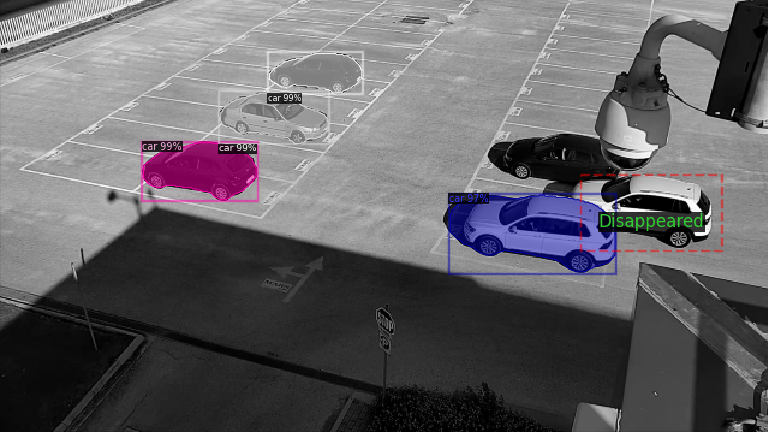

@1102 --> number of detected objs = 4
tensor([[2.5944e-02, 5.0848e+01, 1.2630e+02, 2.2475e+02],
        [5.0835e+01, 8.5075e-02, 7.6062e+01, 2.3584e+02],
        [1.2632e+02, 7.6042e+01, 4.4229e-03, 2.8157e+02],
        [2.2431e+02, 2.3540e+02, 2.8128e+02, 5.1513e-01]])


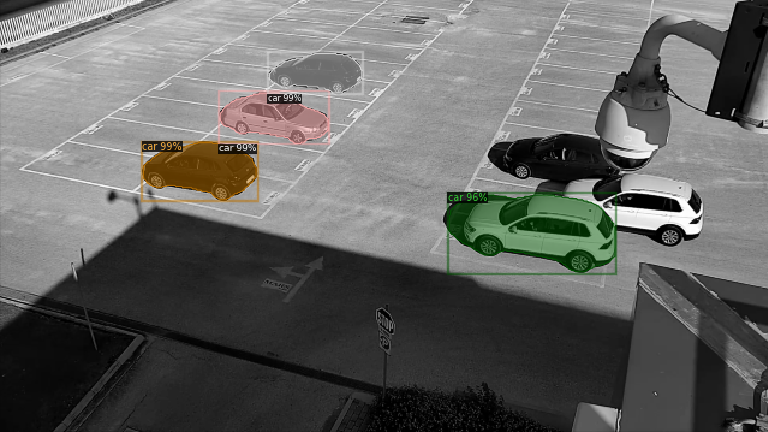

[{'frame': '1070', 'status': ['Parked', 'Parked', 'Parked', 'Parked', 'Parked'], 'areas': [2777.671875, 4060.913330078125, 4728.07177734375, 5511.44482421875, 9339.9150390625], 'centers': [[262.6797180175781, 61.08894729614258], [228.43092346191406, 98.40138244628906], [166.62738037109375, 142.8125], [463.10760498046875, 136.11744689941406], [442.9964599609375, 193.8798828125]]}, {'frame': '1072', 'status': ['Parked', 'Parked', 'Parked', 'Parked', 'Parked'], 'areas': [2778.9453125, 4049.764892578125, 4989.51171875, 5512.48486328125, 9351.31640625], 'centers': [[262.68011474609375, 61.09276580810547], [228.43084716796875, 98.36326599121094], [166.4905548095703, 141.90939331054688], [463.19952392578125, 136.13687133789062], [442.86871337890625, 193.8386688232422]]}, {'frame': '1074', 'status': ['Parked', 'Parked', 'Parked', 'Parked', 'Parked'], 'areas': [2773.137451171875, 4048.593994140625, 4994.70947265625, 5524.6904296875, 9371.5703125], 'centers': [[262.6734313964844, 61.052577972412

In [ ]:
import numpy as np
import torch

CHECK_PREVIOUS_NEXT_ = 18
CAR_INDEX = 2

# **************************************************************** 
#  A tool to recover objects that are hidden because of 
#  entering a crowded zone. 
#  The detector identifies a single object only with Large volume,
#  instead of many small ones.
# ****************************************************************  
def correct_occlusions():
  print( "Ready to Examine Variations in Number of Detected Objects ... " )
  print( "  --> Decreases Between Consecutive Frames" )
  print( "  --> Objects Left or Hidden by Another One ?" )
  
  previous_objs_num = video_lab[0].get('objects-num')
  
  labels = video_lab[0].get('objects-labels').tolist()
  previous_cars_num = labels.count( CAR_INDEX ) 
  
  num_frames = len( video_lab )
  
  for i in range( 0, len(video_lab) ):
    # The collection of data for Frame-XXX
    frame_dict = video_lab[ i ]

    frame_num = frame_dict.get( 'frame-number' )
    objects_num = frame_dict.get( 'objects-num' ) 

    labels = frame_dict.get( 'objects-labels' ).tolist()
    cars_num = labels.count( CAR_INDEX )
    
    #if (objects_num < previous_objs_num) and 
    if (cars_num < previous_cars_num):
      # Car is missing  --- Have many consecutive cars seen as BIG one ? 
      print( "!!! Number of Detected Cars is Dropped !!!" )
      print( "   @Frame-%d : CURRENT / PREVIOUS = %d / %d" % (frame_num, cars_num, previous_cars_num) )

      check_history_from_all( frame_num, CHECK_PREVIOUS_NEXT_ )

    previous_objs_num = objects_num
    previous_cars_num = cars_num

correct_occlusions()

In [ ]:
CAR_class_index = 2
PERSON_class_index = 0
BACKPACK_class_index = 25

FRAME_0 = 1080
FRAME_1 = 1088
FRAME_2 = 1096
FRAME_3 = 1104
FRAME_4 = 1112
FRAME_5 = 1120
FRAME_6 = 1128
FRAME_7 = 1136

dim_1 = 10 # How many interesting objects / Frame

dim_2 = 5 # Features / Object
# Frame, Class, Center_X, Center_Y, Area, 

history = torch.zeros(KEEP_LAST_POS, dim_1, dim_2)
#print( history )

# *************************************
#  Car is Approaching Not Visible Yet  
#    Reading Frame-1056
# *************************************
img = cv2.imread( "parking-space/Videos/frames/frame" + str(FRAME_0) + ".png" )
outputs = predictor(img)

# *** BOUNDING-BOXES ***
# Bounding-Boxes of Detected Objects in Frame-1056 .... Number of Cars = 5 (Parked from t=0) 
output_pred_boxes = outputs["instances"].pred_boxes
print( "Number of Bounded Boxes = " + str( len(output_pred_boxes) ) )
print( output_pred_boxes )

# Calculate Distance Between Cars in Row 3
box_A = output_pred_boxes[3]
box_B = output_pred_boxes[5]
print( "Ready to Compute Distance Between Parked ..." )
compute_distance_between_two_rectangles( box_A, box_B )
# *************** EndOf Distance Between Cars ****************
box_X = output_pred_boxes[4]
print( "Ready to Compute Distance Between New and Parked-Left ...." )
compute_distance_between_two_rectangles( box_X, box_A )
print( "Ready to Compute Distane Between New and Parked-Right ...." )
compute_distance_between_two_rectangles( box_X, box_B)

slot_A = all_parking_slots[19]
tA = torch.Tensor()
for i in range(2, 6):
  slot_A_c1 = slot_A[i].split('-')
  
  slot_A_c1_x = int(slot_A_c1[0].strip())
  slot_A_c1_y = int(slot_A_c1[1].strip())
  
  tA_c1 = torch.Tensor( [[slot_A_c1_x, slot_A_c1_y]] )

  tA = torch.cat( (tA, tA_c1), dim=0 )
#print( tA )

slot_B = all_parking_slots[21]
tB = torch.Tensor()
for i in range(2, 6):
  slot_B_c1 = slot_B[i].split('-')
  
  slot_B_c1_x = int(slot_B_c1[0].strip())
  slot_B_c1_y = int(slot_B_c1[1].strip())
  
  tB_c1 = torch.Tensor( [[slot_B_c1_x, slot_B_c1_y]] )

  tB = torch.cat( (tB, tB_c1), dim=0 )
#print( tB )

dist_ALL = torch.cdist(tA, tB)
dist_ALL = torch.diagonal( dist_ALL )
slot_size = torch.mean( dist_ALL ).numpy()
print( "Parking-Slot Size = %f" % slot_size )

centers = output_pred_boxes.get_centers()
areas   = output_pred_boxes.area()

# *** CLASSES/ CATEGORIES ***
# Detected-Classes of Interesting Objects 
output_pred_classes = outputs["instances"].pred_classes
num_labels = len(output_pred_classes)
print( "Total Number of Detected Classes = %d" % num_labels )

# How many detected objects are .... CARS ?
car_labels = output_pred_classes == CAR_class_index

# How many detected objects are .... PEOPLE ?
person_labels = output_pred_classes == PERSON_class_index

# How many detected objects are .... BACKPACK ?
backpack_labels = output_pred_classes == BACKPACK_class_index

# Convert from tensor --> "np.ndarray" --> python-list 
   #print( car_labels[0].__class__ )
car_labels = car_labels.numpy().tolist()
num_cars      = car_labels.count( True )

#print( person_labels.__class__ )
person_labels = person_labels.numpy().tolist()
num_people    = person_labels.count( True )

backpack_labels = backpack_labels.numpy().tolist()
num_backpacks = backpack_labels.count( True )

print( "How Many Cars Found = %d" % num_cars )
print( "How Many People Found = %d" % num_people )
print( "How Many Backpack Found = %d" % num_backpacks )

# HISTORY 
# Store Objects of Current Frame to History
for c_i in range(0, num_labels ):
  history[0, c_i, 0] = FRAME_0

  history[0, c_i, 1] = output_pred_classes[c_i]

  history[0, c_i, 2] = centers[c_i][0]
  history[0, c_i, 3] = centers[c_i][1]

  history[0, c_i, 4] = areas[c_i]
#print( history )

# **************************************************************
# Save BBoxes of Current Frame --> Comparison with Next Frame
# class 'detectron2.structures.boxes.Boxes'>
# **************************************************************
# print( output_pred_boxes.__class__ )
previous_frame_bboxes = output_pred_boxes

# PREVIOUS LABELS
previous_num_labels    = num_labels
previous_num_cars      = num_cars
previous_num_people    = num_people
previous_num_backpacks = num_backpacks

# !!!! Exmples of Basic Operations in Detectron2-Structures 
# !!!! Instances, Boxes
# 
# --> Iteration && Remove "Cuda + Tensor" Format 
# for i in output_pred_boxes.__iter__():
#  bbox_i = i.cpu().numpy()
#  print(bbox_i)

# --> Iteration 4 Predefined Classes
# for pred_cl in outputs["instances"].pred_classes:
#  class_index = pred_cl.cpu().numpy()
#  print(  class_names[ class_index ])

# --> Select specific instances of category XX
# instances = outputs["instances"]
# category_2_detections = instances[ instances.pred_classes == 2 ]
# print( category_2_detections )

# --> Detectron2-Structures: Boxes :: Useful Operations
# for i in range( len(outputs["instances"] )):
#  instance = outputs["instances"][i]

#  print( instance.get('pred_boxes').get_centers().cpu().numpy() )
#  print( instance.get('pred_boxes').area().cpu().numpy() )
  
#  print( instance.get( 'pred_classes').cpu().numpy() )

# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$     NEXT FRAME                      $$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ 
# *****************************************
#  New Car is Entering the Parking Space  
#    Reading Frame-1080
# *****************************************
# Image Read
img = cv2.imread( "parking-space/Videos/frames/frame" + str(FRAME_1) + ".png" )
# Object Classes Prediction
outputs = predictor(img)

# Detectron2::Structures: Instances
parking_instances = outputs["instances"]

# Labels
pred_classes = parking_instances.pred_classes
num_labels = len( pred_classes )
#print( "New Frame - Found %d Labels" % num_labels )

if num_labels > previous_num_labels:
  # New Objects Detected
  print( "New Objects Detected ... %d / %d" % (num_labels , previous_num_labels) ) 

# How many cars ?
car_labels = pred_classes == CAR_class_index
car_labels = car_labels.numpy().tolist()
num_cars      = car_labels.count( True )

if num_cars > previous_num_cars:
  # New Cars Found !
  diff_cars = num_cars - previous_num_cars
  print('Number of New Cars in Parking Space = %d' % diff_cars)

# How many people ?
person_labels = pred_classes == PERSON_class_index
person_labels = person_labels.numpy().tolist()
num_people    = person_labels.count( True )

if num_people > previous_num_people:
  # New People Found !
  diff_people = num_people - previous_num_people
  print('Number of New People in Parking Space = %d' % diff_people)

# How many backpacks ?
backpack_labels = pred_classes == BACKPACK_class_index
backpack_labels = backpack_labels.numpy().tolist()
num_backpacks = backpack_labels.count( True )

if num_backpacks > previous_num_backpacks:
  # New Backpacks Found !
  diff_backpacks = num_backpacks - previous_num_backpacks
  print('Number of New Backpacks in Parking Space = %d' % diff_backpacks)

# Find New Object .. 
#  Compare Bounding Boxes
#    Previous BBoxes VS Current BBoxes
previous_centers = previous_frame_bboxes.get_centers()
previous_centers_np = previous_centers.numpy()
#print( previous_centers_np )

# ***** Bounding Boxes *****
frame_bboxes = parking_instances.pred_boxes
centers = frame_bboxes.get_centers()
centers_np = centers.numpy()
areas = frame_bboxes.area()

# Not Working : Current-Centers-Size > Previous-Centers-Size (due to NEW object)
# diff_centers = torch.subtract(centers, previous_centers)

diff_centers = torch.cdist( centers, previous_centers )
#print( diff_centers )

# Result is 
#tensor([[7.1647e-02, 5.0756e+01, 1.2607e+02, 2.1419e+02, 2.2393e+02],
#        [5.0554e+01, 1.5129e-01, 7.6100e+01, 2.3782e+02, 2.3480e+02],
#        [1.2567e+02, 7.5664e+01, 8.7887e-01, 2.9684e+02, 2.8130e+02],
#        [2.1401e+02, 2.3775e+02, 2.9645e+02, 1.6225e-01, 6.1143e+01],
#        [3.5736e+02, 3.7903e+02, 4.3220e+02, 1.4320e+02, 1.5362e+02],
#        [2.2344e+02, 2.3444e+02, 2.8053e+02, 6.0989e+01, 4.4946e-01]])
# Each Row has ONLY ONE element e-02 ... distance of bbox from ITSELF
# only rOW#05 is VERY distant from EXISTINGS .. all are e+02
# BBOX 5 is NEW OBJECT

# Sum of distances of ... First Detected Object ... from All Other
#s = torch.sum( diff_centers[0] )
#print( s )

# Sum of distances of ... Second Detected Object ... from All Other
#s = torch.sum( diff_centers[1] )
#print( s )

# Sum of distances of ... Third Detected Object ... from All Other
#s = torch.sum( diff_centers[2] )
#print( s )

# Sum of distances of ... Forth Detected Object ... from All Other
#s = torch.sum( diff_centers[3] )
#print( s )

# Sum of distances of ... Fifth Detected Object ... from All Other
#s = torch.sum( diff_centers[4] )
#print( s )

# Sum of distances of ... Sixth Detected Object ... from All Other
#s = torch.sum( diff_centers[5] )
#print( s )

# SOS ... Torch offers Tensor Computations ... Distance of every tensor element from other ... From A to B
s = torch.sum( diff_centers, 1 )
print( 'Eigen-Array: Between All Objects Distances ... ' ) 
print( s )

# SOS 2 ... What is the more distant object
max_i = torch.argmax( s )
max_i = max_i.item()      # Convert from Torch:Tensor to "int"

# DETECTOR DETECTS ALL CARS PER FRAME 
### MANAGED TO LOCATE THE NEW CAR THAT HAS JUST ENTERED THE PARKING SPACE
##### NEED TO STORE THE CLASS OF NEW OBJECT IN CASE OF FUTURE PROBLEMS WITH OCCLUSIONS 
#print( frame_bboxes.tocpu().numpy() )
new_obj_bbox = frame_bboxes.__getitem__( max_i ) 

print( "Centers of BBoxes-Detected-Objects are: ")
print( centers )

# Compute distance between all BoundingBoxes - using centers
between_centers = torch.cdist(centers, centers )
print( "Centers Between All Detected Objects in Frame: " )
print( between_centers )
print( "Distances of New Object from Remainings in this Frame: " )
print( between_centers[max_i] )

# CROP IMAGE UNDER THE NEW OBJECT BOUNDING BOX
# --------------------------------------------
template_new_obj = None
for bbox_XX in new_obj_bbox:
  xy_all =  bbox_XX.tolist()
  
  x_1 = round( xy_all[0] )
  y_1 = round( xy_all[1] )
  x_2 = round( xy_all[2] )
  y_2 = round( xy_all[3] )

  size_w = x_2 - x_1
  size_h = y_2 - y_1

  print( xy_all )
  print( "Width = %f" % size_w )
  print( "Height = %f" % size_h ) 

  print( 'Size --> %d' % img.size )
  
  nrows, ncols, nchannels = img.shape
  print( "NR( %d ) x NC( %d ) x CH( %d )" % (nrows, ncols, nchannels ) )

  # SOS ... x = cols && y = rows
  template = img[ y_1: y_1 + size_h, x_1: x_1 + size_w ]
  print( "Template-NR( %d ) x NC( %d ) x CH( %d )" % (template.shape[0], template.shape[1], template.shape[2]) )
  #template = cv2.cvtColor(template, cv2.COLOR_RGB2GRAY)
  
  cv2_imshow( template )
  
  template_new_obj = template
# END-OF CROP IMAGE OF INTERESTING IMAGE

new_obj_area = new_obj_bbox.area()
new_obj_center = centers[ max_i ].numpy()
new_obj_class  = pred_classes[ max_i ].numpy()

print( 'LOCATED NEW OBJET ...' )
print( '--> Bounding Box is = ' + str( new_obj_bbox ) )
print( '--> Area of BBox is = %f' % new_obj_area )
print( '--> Center of BBox is = ' + str( new_obj_center ) )
print( '--> Class is = ' + class_names[ new_obj_class ].upper() )
print( '--> Index in List of Availables = %d' % max_i )

# HISTORY 
# Store Objects of Current Frame to History
num_labels = len( centers )
for c_i in range(0, num_labels ):
  history[1, c_i, 0] = FRAME_1

  history[1, c_i, 1] = pred_classes[c_i]

  history[1, c_i, 2] = centers[c_i][0]
  history[1, c_i, 3] = centers[c_i][1]

  history[1, c_i, 4] = areas[c_i]
#print( history )

#bbox = frame_bboxes[0]
#bbox = bbox.numpy()
#print( tuple(bbox) )
#print( tuple(bbox[:2]) )

# ###
# !!!!! Add Visual Indication for New Object in Original Frame !!!!!
# !!! How to Draw a Box and a Label for New Object !!!
# ###
# ------------------------------->>>>>>>><<<<<<<<<-----------------------------------
# Detectron2 Utils --> Visualizer with Helper Functions for Drawing on Top of Images 
v = Visualizer( img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2 )

# Draw Prediction Masks
v.draw_instance_predictions(outputs["instances"].to("cpu"))

next_music_box = torch.Tensor()
# Draw Location Results
for box_x in new_obj_bbox:
  music_box = box_x.tolist()
  
  # @@@@ # Draw a Box with a Lebal INSIDE @@@@
  v.draw_box( music_box, edge_color='b', line_style='--' )
  v.draw_text('new' + class_names[new_obj_class].upper(), new_obj_center, font_size=12 )

  next_music_box = torch.add( box_x, torch.Tensor([-120, -25, -60, -10]) )
  v.draw_box( next_music_box.tolist(), edge_color='r', line_style='--' )
  
out = v.get_output()
cv2_imshow( out.get_image() )
# ----------------------->>>>> End of Visualization <<<<<-------------------------

previous_center_new_obj = new_obj_center
previous_area_new_obj   = new_obj_area
index_new_obj  = max_i

# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$     NEXT FRAME                      $$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ 
# ******************************************************
#  New Car : Next Frame After Entering the Parking Space  
#    Reading Frame-1088
# ******************************************************
# Image Read
img = cv2.imread( "parking-space/Videos/frames/frame" + str(FRAME_2) + ".png" )
# Object Classes Prediction
outputs = predictor(img)
parking_instances = outputs["instances"]

# Labels
pred_classes = parking_instances.pred_classes
num_labels = len( pred_classes )

frame_bboxes = parking_instances.pred_boxes
centers = frame_bboxes.get_centers()
areas = frame_bboxes.area()

# HISTORY 
# Store Objects of Current Frame to History
num_labels = len( centers )
for c_i in range(0, num_labels ):
  history[2, c_i, 0] = FRAME_2

  history[2, c_i, 1] = pred_classes[c_i]

  history[2, c_i, 2] = centers[c_i][0]
  history[2, c_i, 3] = centers[c_i][1]

  history[2, c_i, 4] = areas[c_i]
#print( history )

#next_center_new_obj = frame_bboxes[ index_new_obj ].get_centers()
#next_center_new_obj = next_center_new_obj.numpy()
#print( next_centers_new_obj )

# Not Working : Current-Centers-Size > Previous-Centers-Size (due to NEW object)
# diff_centers = torch.subtract(centers, previous_centers)

#diff_centers = torch.cdist( centers, previous_centers )
#print( diff_centers )

from scipy.ndimage import rotate as rot
#next_music_box = torch.from_numpy( rot(next_music_box, 10, reshape=False) )

print( next_music_box.__class__ )

from detectron2.structures.boxes import Boxes 

boxes_1d = torch.zeros(1, 4)
boxes_1d[0, :] = next_music_box[::]
#test_boxes_1d = Boxes.__init__( torch.Tensor(next_music_box.tolist() ) )
test_boxes_1d = Boxes( boxes_1d )

#iou = detectron2.structures.pairwise_iou( frame_bboxes[3], frame_bboxes[0] )
iou = detectron2.structures.pairwise_iou( frame_bboxes[3], test_boxes_1d )
print( iou )

v = Visualizer( img[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2 )

# Draw Prediction Masks
v.draw_instance_predictions(outputs["instances"].to("cpu"))

v.draw_box( next_music_box.tolist(), edge_color='r', line_style='--' )

out = v.get_output()
cv2_imshow( out.get_image() )

# Perform Template Matching Using OpenCV
methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR',
            'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']

res = cv2.matchTemplate( img, template_new_obj, method=0)
#print( res )
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

w = template.shape[0]
h = template.shape[1]
top_left = max_loc
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle( img, top_left, bottom_right, 255, 2)

cv2_imshow( img )

# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$     NEXT FRAME                      $$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ 
# ******************************************************
#  New Car : Next Frame After Entering the Parking Space  
#    Reading Frame-1096
# ******************************************************
# Image Read
img = cv2.imread( "parking-space/Videos/frames/frame" + str(FRAME_3) + ".png" )
# Object Classes Prediction
outputs = predictor(img)
parking_instances = outputs["instances"]

# Labels
pred_classes = parking_instances.pred_classes
num_labels = len( pred_classes )

frame_bboxes = parking_instances.pred_boxes
centers = frame_bboxes.get_centers()
areas = frame_bboxes.area()

row, col = detect_parking_slot( None, centroid=[596, 188] )
print( "Row is = %d / Slot = %d" % (row, col) )

# HISTORY 
# Store Objects of Current Frame to History
num_labels = len( centers )
for c_i in range(0, num_labels ):
  history[3, c_i, 0] = FRAME_3

  history[3, c_i, 1] = pred_classes[c_i]

  history[3, c_i, 2] = centers[c_i][0]
  history[3, c_i, 3] = centers[c_i][1]

  history[3, c_i, 4] = areas[c_i]
#print( history )

# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$     NEXT FRAME                      $$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ 
# ******************************************************
#  New Car : Next Frame After Entering the Parking Space  
#    Reading Frame-1104
# ******************************************************
# Image Read
img = cv2.imread( "parking-space/Videos/frames/frame" + str(FRAME_4) + ".png" )
# Object Classes Prediction
outputs = predictor(img)
parking_instances = outputs["instances"]

# Labels
pred_classes = parking_instances.pred_classes
num_labels = len( pred_classes )

frame_bboxes = parking_instances.pred_boxes
centers = frame_bboxes.get_centers()
areas = frame_bboxes.area()

# HISTORY 
# Store Objects of Current Frame to History
num_labels = len( centers )
for c_i in range(0, num_labels ):
  history[4, c_i, 0] = FRAME_4

  history[4, c_i, 1] = pred_classes[c_i]

  history[4, c_i, 2] = centers[c_i][0]
  history[4, c_i, 3] = centers[c_i][1]

  history[4, c_i, 4] = areas[c_i]
#print( history )

# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$     NEXT FRAME                      $$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ 
# ******************************************************
#  New Car : Next Frame After Entering the Parking Space  
#    Reading Frame-1112
# ******************************************************
# Image Read
img = cv2.imread( "parking-space/Videos/frames/frame" + str(FRAME_5) + ".png" )
# Object Classes Prediction
outputs = predictor(img)
parking_instances = outputs["instances"]

# Labels
pred_classes = parking_instances.pred_classes
num_labels = len( pred_classes )

frame_bboxes = parking_instances.pred_boxes
centers = frame_bboxes.get_centers()
areas = frame_bboxes.area()

# HISTORY 
# Store Objects of Current Frame to History
num_labels = len( centers )
for c_i in range(0, num_labels ):
  history[5, c_i, 0] = FRAME_5

  history[5, c_i, 1] = pred_classes[c_i]

  history[5, c_i, 2] = centers[c_i][0]
  history[5, c_i, 3] = centers[c_i][1]

  history[5, c_i, 4] = areas[c_i]
#print( history )

# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$     NEXT FRAME                      $$$$$$$$$$$$$$$$$
# $$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$ 
# ******************************************************
#  New Car : Next Frame After Entering the Parking Space  
#    Reading Frame-1120
# ******************************************************
# Image Read
img = cv2.imread( "parking-space/Videos/frames/frame" + str(FRAME_6) + ".png" )
# Object Classes Prediction
outputs = predictor(img)
parking_instances = outputs["instances"]

# Labels
pred_classes = parking_instances.pred_classes
num_labels = len( pred_classes )

frame_bboxes = parking_instances.pred_boxes
centers = frame_bboxes.get_centers()
areas = frame_bboxes.area()

# HISTORY 
# Store Objects of Current Frame to History
num_labels = len( centers )
for c_i in range(0, num_labels ):
  history[6, c_i, 0] = FRAME_6

  history[6, c_i, 1] = pred_classes[c_i]

  history[6, c_i, 2] = centers[c_i][0]
  history[6, c_i, 3] = centers[c_i][1]

  history[6, c_i, 4] = areas[c_i]
#print( history )


In [ ]:
instance_0 = outputs['instances'][0]
bboxes_0 = instance_0[0].get('pred_boxes')
print(bboxes_0)

instance_1 = outputs['instances'][1]
bboxes_1 = instance_1[0].get('pred_boxes')
print(bboxes_1)

instance_2 = outputs['instances'][2]
bboxes_2 = instance_2[0].get('pred_boxes')
print(bboxes_2)

instance_3 = outputs['instances'][3]
bboxes_3 = instance_3[0].get('pred_boxes')
print(bboxes_3)

img = cv2.imread(videofile)

image = cv2.circle(img, (114, 162), radius=3, color=(255,0,255), thickness=-1)
#image = cv2.circle(image, (222,  90), radius=3, color=(0,255,255), thickness=-1)
#image = cv2.circle(image, (76, 129), radius=3, color=(0,0,255), thickness=-1)
#image = cv2.circle(image, (114, 162), radius=3, color=(0,255,0), thickness=-1)

cv2_imshow(image)